<h2> Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
import seaborn as sns

<h2> Loading the dataset

In [2]:
# Load train data 
dataset = pd.read_csv("data/dataset.csv")
dataset.head()

,claim_number,age_of_driver,gender,marital_status,safty_rating,annual_income,high_education_ind,address_change_ind,living_status,zip_code,...,liab_prct,channel,policy_report_filed_ind,claim_est_payout,age_of_vehicle,vehicle_category,vehicle_price,vehicle_color,vehicle_weight,fraud
0,1,46,M,1.0,85,38301,1,1,Rent,80006,...,74,Broker,0,7530.940993,9.0,Compact,12885.45235,white,16161.33381,0
1,3,21,F,0.0,75,30445,0,1,Rent,15021,...,79,Online,0,2966.024895,4.0,Large,29429.45218,white,28691.96422,0
2,4,49,F,0.0,87,38923,0,1,Own,20158,...,0,Broker,0,6283.888333,3.0,Compact,21701.18195,white,22090.94758,1
3,5,58,F,1.0,58,40605,1,0,Own,15024,...,99,Broker,1,6169.747994,4.0,Medium,13198.27344,other,38329.58106,1
4,6,38,M,1.0,95,36380,1,0,Rent,50034,...,7,Broker,0,4541.387150,7.0,Medium,38060.21122,gray,25876.56319,0


<h5> Basic Information on the Dataset

In [3]:
dataset.shape


(17998, 25)

In [4]:
dataset.dtypes

claim_number                 int64
age_of_driver                int64
gender                      object
marital_status             float64
safty_rating                 int64
annual_income                int64
high_education_ind           int64
address_change_ind           int64
living_status               object
zip_code                     int64
claim_date                  object
claim_day_of_week           object
accident_site               object
past_num_of_claims           int64
witness_present_ind        float64
liab_prct                    int64
channel                     object
policy_report_filed_ind      int64
claim_est_payout           float64
age_of_vehicle             float64
vehicle_category            object
vehicle_price              float64
vehicle_color               object
vehicle_weight             float64
fraud                        int64
dtype: object

<h5>Description: </h5> 

- Size: 17998 records, 25 features

<h5> Features: </h5>

1. `claim_number` (int64): A unique identifier for each insurance claim.  
2. `age_of_driver` (int64): The age of the driver associated with the insurance claim.
3. `gender` (object): The gender of the driver (‘M’ : ‘Male’, ‘F’ : ‘Female’).
4. `marital_status` (float64): The marital status of the driver. (1.0 : ‘Married’ , 0.0: ‘Single’)
5. `safety_rating` (int64): A safety rating associated with the driver or vehicle, higher values indicate higher safety
6. `annual_income` (int64): The annual income of the policyholder or driver.
7. `high_education_ind` (int64): An indicator of the driver's level of education, higher values indicate higher education level
8. `address_change_ind` (int64): An indicator of whether the driver has recently changed their address.(1 : ‘Yes’, 0 : ‘No’)
9. `living_status` (object): The living status of the driver (‘Rent’, ‘Own’).
10. `zip_code` (int64): The ZIP code associated with the driver's address.
11. `claim_date` (object): The date when the insurance claim was filed, in ‘MM/DD/YYYY’ format
12. `claim_day_of_week` (object): The day of the week when the insurance claim was filed. (‘Monday’ - ‘Sunday’)
13. `accident_site` (object): The location/site of the accident. (‘Local’ / ‘Highway’ / ‘Parking Lot’)
14. `past_num_of_claims` (int64): The number of previous claims made by the driver.
15. `witness_present_ind` (float64): An indicator of whether witnesses were present during the accident.(1.0: ‘Yes’,  0.0’ : No’)
16. `liab_prct` (int64): The liability percentage associated with the claim.
17. `channel` (object): The channel or method through which the claim was reported. ('Broker' / 'Online' / ‘Phone')
18. `policy_report_filed_ind` (int64): An indicator of whether a policy report was filed as part of the claim.(1 : ‘Yes’, 0 : ‘No’)
19. `claim_est_payout` (float64): The estimated payout amount for the insurance claim.
20. `age_of_vehicle` (float64): The age of the vehicle involved in the claim.
21. `vehicle_category` (object): The category or type of the vehicle.('Compact' / 'Large' / ‘Medium')
22. `vehicle_price` (float64): The price of the vehicle.
23. `vehicle_color` (object): The color of the vehicle.
24. `vehicle_weight` (float64): The weight of the vehicle.
25. `fraud` (int64): An indicator of whether the insurance claim is associated with fraud (1 : fraud , 0 : non-fraud).

<h2> Global Preprocessing

In this part, we will complete necessary preprocessing steps that are not dependent on the datasets. These include removal of missing values as they may lead to errors during training of models later. <br><br>
Global preprocessing is not dataset dependent. Hence the steps will be applied on the full dataset without risks for target leakage. 

<h5> Finding missing values

In [5]:
dataset.isna().sum()

claim_number                 0
age_of_driver                0
gender                       0
marital_status               5
safty_rating                 0
annual_income                0
high_education_ind           0
address_change_ind           0
living_status                0
zip_code                     0
claim_date                   0
claim_day_of_week            0
accident_site                0
past_num_of_claims           0
witness_present_ind        132
liab_prct                    0
channel                      0
policy_report_filed_ind      0
claim_est_payout            17
age_of_vehicle               8
vehicle_category             0
vehicle_price                0
vehicle_color                0
vehicle_weight               0
fraud                        0
dtype: int64

<h5> Dropping rows with missing values </h5><br>
We decided to drop all rows with missing values. This is because the number of rows with missing values (~100) is insignificant compared to the total number of rows in our dataset (~18000). By dropping the rows, we still retain all feature columns for analysis later. 

In [6]:
dataset.dropna(inplace=True)

In [7]:
dataset.shape

(17836, 25)

<h2> Exploratory Data Analysis </h2><br>
After the missing values in the dataset have been removed, we will do exploratory data analysis to better understand the landscape and trends in our dataset. This will be done on the full dataset so we have a comprehensive understanding of the whole picture.

2. `age_of_driver` (int64): The age of the driver associated with the insurance claim.<br><br>

We will first print out the range of ages in the dataset

In [8]:
age_range = dataset['age_of_driver'].min(), dataset['age_of_driver'].max()
print("Range of age_of_driver:", age_range)

Range of age_of_driver: (18, 229)


From the range, we can see that the maximum age of a driver recorded in the dataset is 229, which is unrealistic. We will deal with such outliers later in local preprocessing based on trends in train dataset to prevent data leakage. Therefore no actions will be taken here during exploratory data analysis. <br>

We will explore the distribution of age of the drivers through plotting a histrogram. 

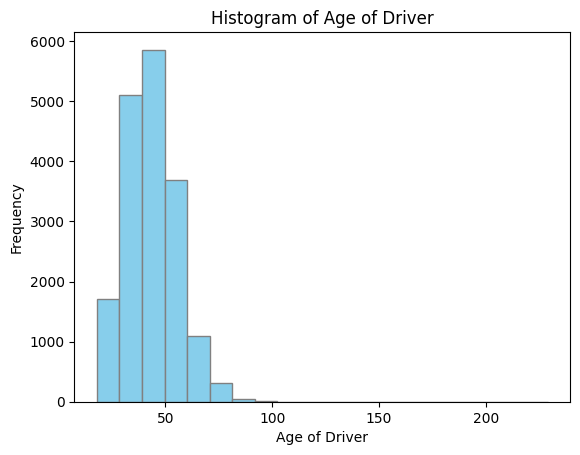

In [9]:
plt.hist(dataset['age_of_driver'], bins=20, color='skyblue', edgecolor='grey')

plt.xlabel('Age of Driver')
plt.ylabel('Frequency')
plt.title('Histogram of Age of Driver')

plt.show()

From the histrogram, we can see that most drivers' ages are in the range from 30 to 60 years old. <br><br>

We will now explore the pattern between age of drivers and fraud class through density estimate plots

C:\Users\wxlim\AppData\Local\Temp\ipykernel_38148\1734565457.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(dataset[dataset["fraud"]==1]["age_of_driver"], shade=True, color="red", label="Fraudulent", ax=ax)
C:\Users\wxlim\AppData\Local\Temp\ipykernel_38148\1734565457.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(dataset[dataset["fraud"]==0]["age_of_driver"], shade=True, color="green", label="Normal", ax=ax)


Text(0.5, 0.98, 'Age of Driver vs Fraud Class')

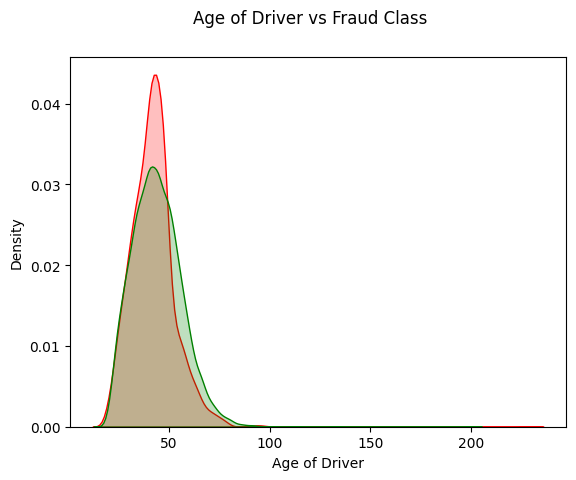

In [10]:
fig, ax = plt.subplots()

sns.kdeplot(dataset[dataset["fraud"]==1]["age_of_driver"], shade=True, color="red", label="Fraudulent", ax=ax)
sns.kdeplot(dataset[dataset["fraud"]==0]["age_of_driver"], shade=True, color="green", label="Normal", ax=ax)

ax.set_xlabel("Age of Driver")
ax.set_ylabel("Density")

fig.suptitle("Age of Driver vs Fraud Class")

From the density estimate plots above, we can see that the pattern between age of drivers and fraud is different for both fraud class and non-fraud class, as fraud frequency overshadows non-fraud when age increase above 55. This might suggest that <code>age_of_driver</code> does not hold much predictive power for frauds. 

3. `gender` (object): The gender of the driver (‘M’ : ‘Male’, ‘F’ : ‘Female’).<br><br>
We will plot a bar graph to see the distribution of gender among the drivers.


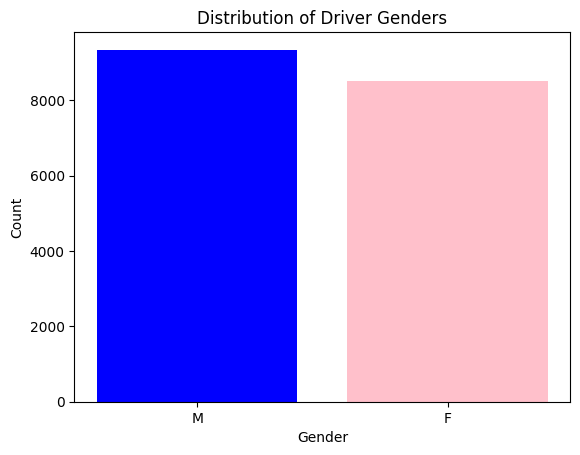

In [11]:
gender_counts = dataset['gender'].value_counts()

plt.bar(gender_counts.index, gender_counts.values, color=['blue', 'pink'])
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Distribution of Driver Genders')

plt.show()

From the bar graph, we can see that the gender distribution of the drivers is largely even, with a slight leaning towards male. <br><br>

We will now explore the pattern between gender and fraud cases through violin plots. 

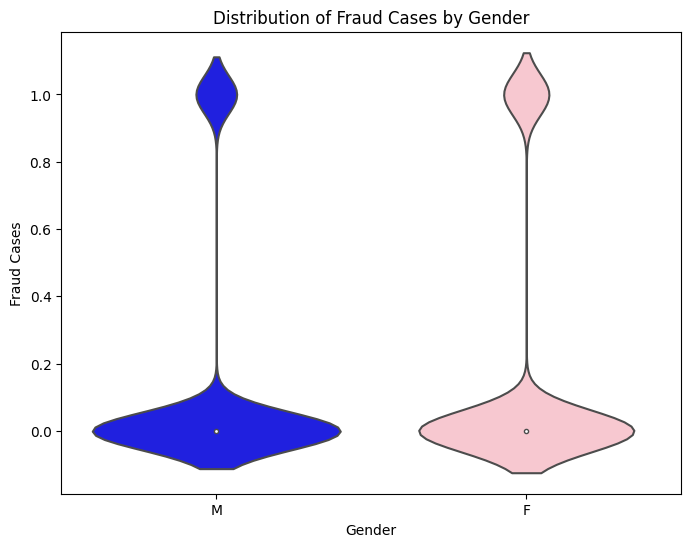

In [12]:
plt.figure(figsize=(8, 6))
sns.violinplot(x='gender', y='fraud', data=dataset, palette=['blue', 'pink'])
plt.xlabel('Gender')
plt.ylabel('Fraud Cases')
plt.title('Distribution of Fraud Cases by Gender')
plt.show()

From the violin plots, we can see the shape of density distribution between fraud and non-fraud classes are very similar for Males and Females. This suggests that <code>gender</code> might not be a good predictor for frauds. 

4. `marital_status` (float64): The marital status of the driver. (1.0 : ‘Married’ , 0.0: ‘Single’) <br><br>
We will plot a bar graph to see the distribution of marital status among the drivers.

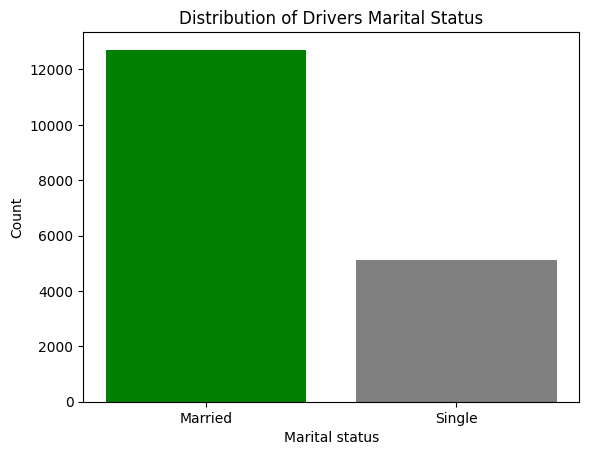

In [13]:
marriage_mappings = dataset['marital_status'].map({1.0: 'Married', 0.0: 'Single'})

marriage_counts = marriage_mappings.value_counts()

plt.bar(marriage_counts.index, marriage_counts.values, color=['green', 'grey'])
plt.xlabel('Marital status')
plt.ylabel('Count')
plt.title('Distribution of Drivers Marital Status')

plt.show()

From the bar graph, we can see that the distribution of marital status is very uneven, with much more married drivers compared to single ones. <br><br>

We will now explore the pattern between marital status and fraud cases through percentage bar plots. 

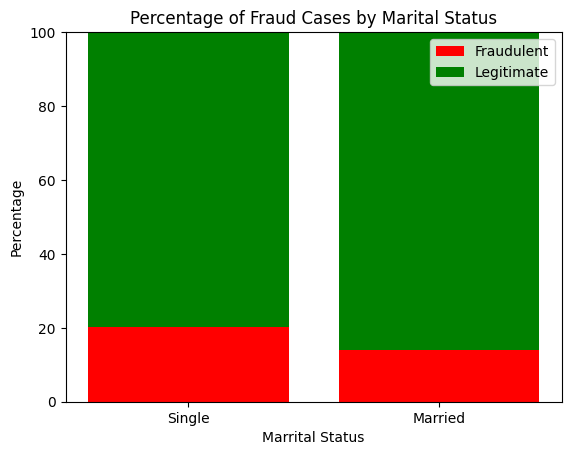

In [14]:
fraud_by_marriage = dataset.groupby('marital_status')['fraud'].mean() * 100
counts_by_marriage = dataset['marital_status'].value_counts()

plt.bar(fraud_by_marriage.index, fraud_by_marriage, label='Fraudulent', color='red')
plt.bar(fraud_by_marriage.index, 100 - fraud_by_marriage, bottom=fraud_by_marriage,
        label='Legitimate', color='green')

plt.xlabel('Marrital Status')
plt.ylabel('Percentage')
plt.title('Percentage of Fraud Cases by Marital Status')
plt.xticks(fraud_by_marriage.index, ['Single', 'Married'])
plt.legend()
plt.ylim(0, 100)
plt.show()

From the bar plots, we can see the shape of density distribution between fraud and non-fraud classes are a bit different between married and single drivers. The plots show that single drivers have a lower density of non-fraud cases and a higher density for fraud cases compared to married drivers. This suggests that <code>marital_status</code> might have some predictive power to detect frauds. 

5. `safety_rating` (int64): A safety rating associated with the driver or vehicle, higher values indicate higher safety. <br><br>

We will first print out the range of ages in the dataset

In [15]:
safety_rating_range = dataset['safty_rating'].min(), dataset['safty_rating'].max()
print("Range of safety rating:", safety_rating_range)

Range of safety rating: (1, 100)


From the range, we can tell that the safety ratings are in a 100 point scoring system. We will then explore the distribution of safety ratings through a histrogram

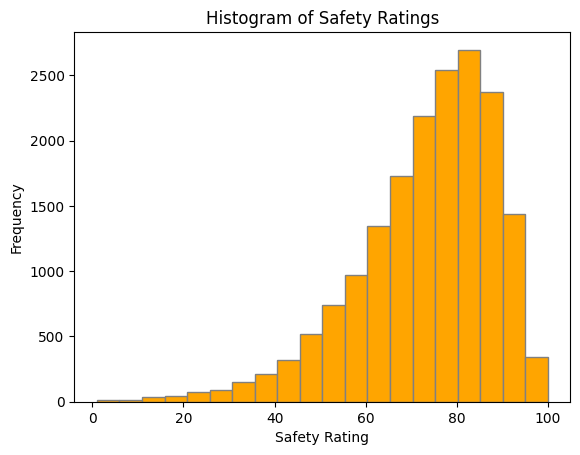

In [16]:
plt.hist(dataset['safty_rating'], bins=20, color='orange', edgecolor='grey')

plt.xlabel('Safety Rating')
plt.ylabel('Frequency')
plt.title('Histogram of Safety Ratings')

plt.show()

From the histogram, we can see that majority of the safety ratings lie in the range of 60 - 95. <br><br>

We will now explore the pattern between safety rating and fraud class through density estimate plots.

C:\Users\wxlim\AppData\Local\Temp\ipykernel_38148\4075450845.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(dataset[dataset["fraud"]==1]["safty_rating"], shade=True, color="red", label="Fraudulent", ax=ax)
C:\Users\wxlim\AppData\Local\Temp\ipykernel_38148\4075450845.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(dataset[dataset["fraud"]==0]["safty_rating"], shade=True, color="green", label="Normal", ax=ax)


Text(0.5, 0.98, 'Safety Rating vs Fraud Class')

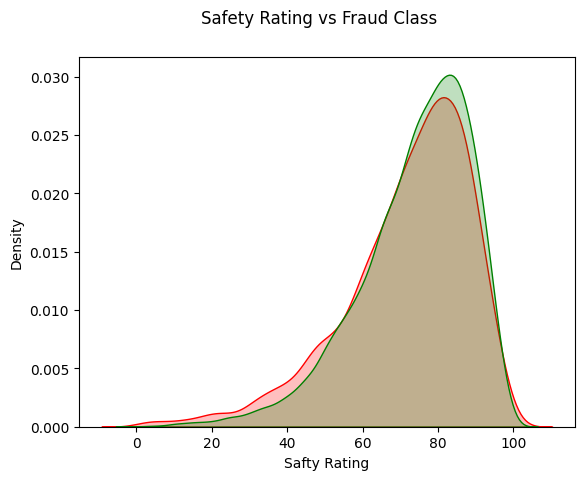

In [17]:
fig, ax = plt.subplots()

sns.kdeplot(dataset[dataset["fraud"]==1]["safty_rating"], shade=True, color="red", label="Fraudulent", ax=ax)
sns.kdeplot(dataset[dataset["fraud"]==0]["safty_rating"], shade=True, color="green", label="Normal", ax=ax)

ax.set_xlabel("Safty Rating")
ax.set_ylabel("Density")

fig.suptitle("Safety Rating vs Fraud Class")

From the density estimate plots above, we can see that the pattern between safety ratings and fraud is quite different for both fraud class and non-fraud class, at lower ratings (<50) and at the peaks. This might suggest that <code>safety_rating</code> is a good predictor for frauds. 

6. `annual_income` (int64): The annual income of the policyholder or driver.<br><br>

We will first print out the range of incomes in the dataset

In [18]:
income_range = dataset['annual_income'].min(), dataset['annual_income'].max()
print("Range of annual income:", income_range)

Range of annual income: (-1, 54333)


We will then plot a boxplot to examine the distribution of annual income. 

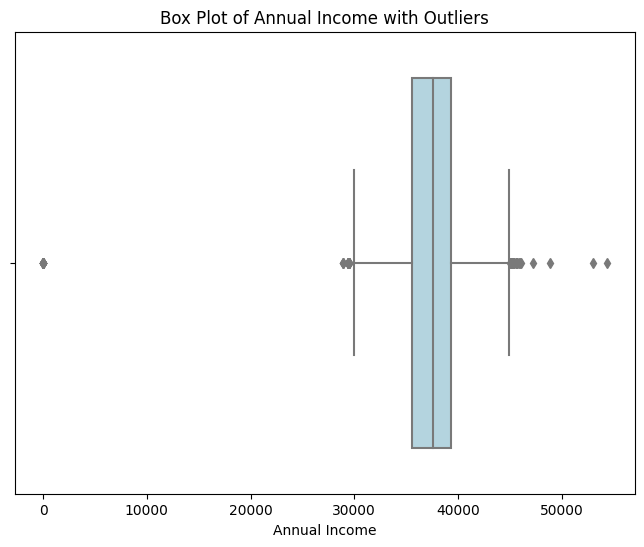

In [19]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=dataset['annual_income'], color='lightblue')
plt.xlabel('Annual Income')
plt.title('Box Plot of Annual Income with Outliers')
plt.show()

From the boxplot, we can see that majority of the drivers have an annual income between \\$30000 and \\$45000. We can see that the points with annual income lower than \\$500 and almost close to \\$0 is a clear outlier and it is not a realistic number for annual income based on our common sense. We will deal with these outliers in local preprocessing using the train dataset later if needed. <br><br>

We will now explore the pattern between annual income and fraud class through density estimate plots.

C:\Users\wxlim\AppData\Local\Temp\ipykernel_38148\386739557.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(dataset[dataset["fraud"]==1]["annual_income"], shade=True, color="red", label="Fraudulent", ax=ax)
C:\Users\wxlim\AppData\Local\Temp\ipykernel_38148\386739557.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(dataset[dataset["fraud"]==0]["annual_income"], shade=True, color="green", label="Normal", ax=ax)


Text(0.5, 0.98, 'Annual Income vs Fraud Class')

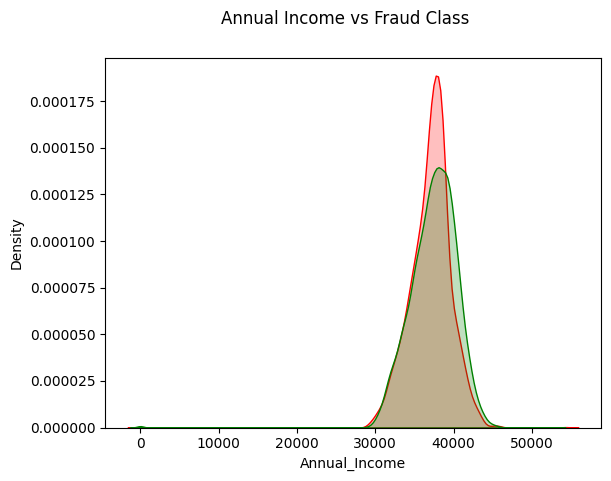

In [20]:
fig, ax = plt.subplots()

sns.kdeplot(dataset[dataset["fraud"]==1]["annual_income"], shade=True, color="red", label="Fraudulent", ax=ax)
sns.kdeplot(dataset[dataset["fraud"]==0]["annual_income"], shade=True, color="green", label="Normal", ax=ax)

ax.set_xlabel("Annual_Income")
ax.set_ylabel("Density")

fig.suptitle("Annual Income vs Fraud Class")

From the density estimate plots above, we can see that the density of fraud cases picked at a lower annual income compared to non-fraud cases. This might suggest that <code>annual_income</code> is a good predictor for frauds and lower income might lead to higher chances of frauds. 

7. `high_education_ind` (int64): An indicator of whether the driver has a high level of education. (1 : ‘Yes’, 0 : ‘No’)


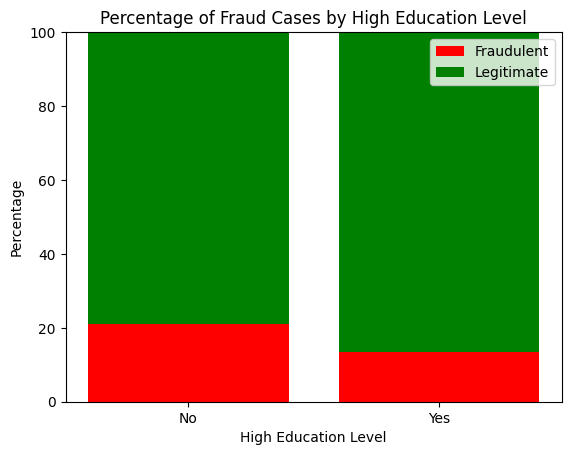

In [21]:
fraud_by_education = dataset.groupby('high_education_ind')['fraud'].mean() * 100
counts_by_education = dataset['high_education_ind'].value_counts()

plt.bar(fraud_by_education.index, fraud_by_education, label='Fraudulent', color='red')
plt.bar(fraud_by_education.index, 100 - fraud_by_education, bottom=fraud_by_education,
        label='Legitimate', color='green')

plt.xlabel('High Education Level')
plt.ylabel('Percentage')
plt.title('Percentage of Fraud Cases by High Education Level')
plt.xticks(fraud_by_education.index, ['No', 'Yes'])
plt.legend()
plt.ylim(0, 100)
plt.show()

From the stacked bar plot, we can see that the percentage of fraud cases is slightly different between drivers without a high education level and drivers with a high education level. We see that around 20% of drivers without a high education level commit fraud insurance claims. In comparison, approximately 15% of drivers with a high education level commit fraud insurance claims. This suggests that <code>high_education_inc</code> could be a good predictor for fraud, where drivers without a high education level have a higher chance of making fraud insurance claims.

8. `address_change_ind` (int64): An indicator of whether the driver has recently changed their address. (1 : ‘Yes’, 0 : ‘No’)


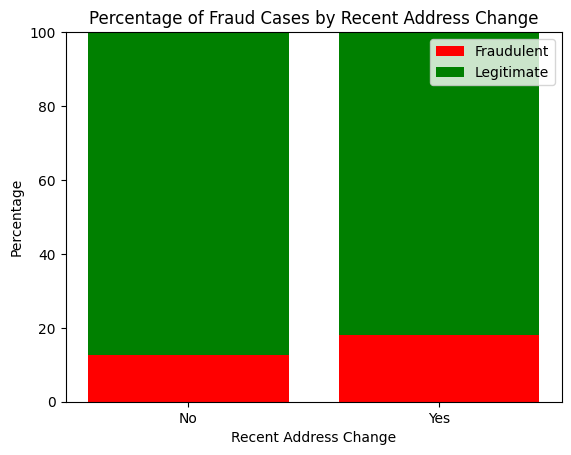

In [22]:
fraud_by_addresschange = dataset.groupby('address_change_ind')['fraud'].mean() * 100
counts_by_addresschange = dataset['address_change_ind'].value_counts()

plt.bar(fraud_by_addresschange.index, fraud_by_addresschange, label='Fraudulent', color='red')
plt.bar(fraud_by_addresschange.index, 100 - fraud_by_addresschange, bottom=fraud_by_addresschange,
        label='Legitimate', color='green')

plt.xlabel('Recent Address Change')
plt.ylabel('Percentage')
plt.title('Percentage of Fraud Cases by Recent Address Change')
plt.xticks(fraud_by_education.index, ['No', 'Yes'])
plt.legend()
plt.ylim(0, 100)
plt.show()

From the stacked bar plot, we can see that the percentage of fraud cases is somewhat different between drivers that recently changed their address and drivers that have not. We see that slightly less 20% of drivers that recently changed their address commit fraud insurance claims. In comparison, approximately 15% of drivers that have not recently changed their address commit fraud insurance claims. This suggests that <code>address_change_ind</code> could be a good predictor for fraud, where drivers that have recently changed their address have a higher chance of making fraud insurance claims.

9. `living_status` (object): The living status of the driver (‘Rent’, ‘Own’).


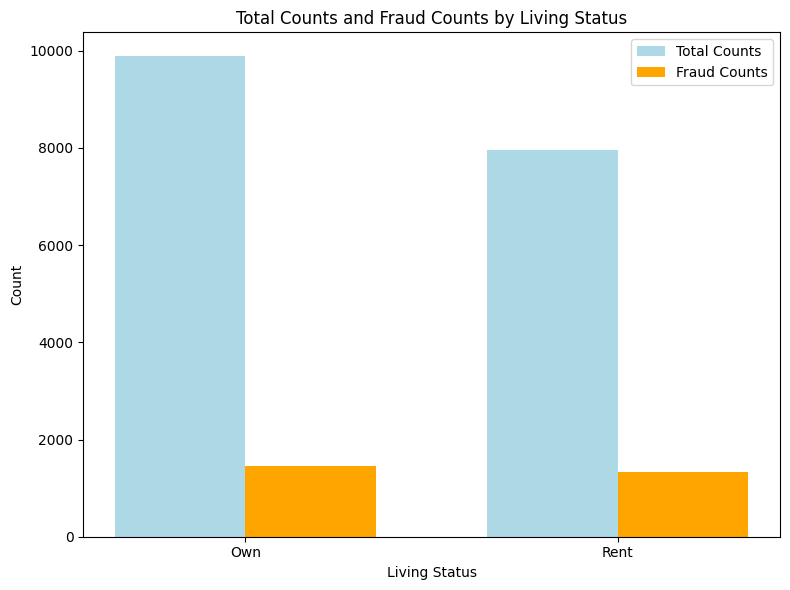

In [23]:
total_counts_by_livingstatus = dataset['living_status'].value_counts()
fraud_counts_by_livingstatus = dataset[dataset['fraud'] == 1]['living_status'].value_counts()

plt.figure(figsize=(8, 6))

bar_width = 0.35
index = range(len(total_counts_by_livingstatus))

bars1 = plt.bar(index, total_counts_by_livingstatus, bar_width, 
                label='Total Counts', color='lightblue')

bars2 = plt.bar([i + bar_width for i in index], fraud_counts_by_livingstatus, bar_width,
                label='Fraud Counts', color='orange')

plt.xlabel('Living Status')
plt.ylabel('Count')
plt.title('Total Counts and Fraud Counts by Living Status')
plt.xticks([i + bar_width / 2 for i in index], total_counts_by_livingstatus.index)
plt.legend()
plt.tight_layout()

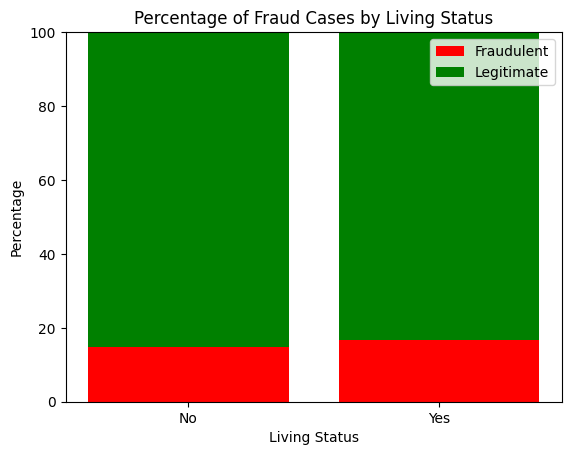

In [24]:
fraud_by_livingstatus = dataset.groupby('living_status')['fraud'].mean() * 100
counts_by_livingstatus = dataset['living_status'].value_counts()

plt.bar(fraud_by_livingstatus.index, fraud_by_livingstatus, label='Fraudulent', color='red')
plt.bar(fraud_by_livingstatus.index, 100 - fraud_by_livingstatus, bottom=fraud_by_livingstatus,
        label='Legitimate', color='green')

plt.xlabel('Living Status')
plt.ylabel('Percentage')
plt.title('Percentage of Fraud Cases by Living Status')
plt.xticks(fraud_by_education.index, ['No', 'Yes'])
plt.legend()
plt.ylim(0, 100)
plt.show()

From the grouped and stacked bar plots, we can see that the percentage of fraud is very similar between drivers that rent and drivers that own their homes. This suggests that <code>living_status</code> might not be a good predictor of fraud.

10. `zip_code` (int64): The ZIP code associated with the driver's address.


In [25]:
zipcode_range = dataset['zip_code'].min(), dataset['zip_code'].max()
print("Range of ZIP codes:", zipcode_range)
unique_zipcodes = len(dataset['zip_code'].unique())
print(f'Number of unique ZIP codes: {unique_zipcodes}')

Range of ZIP codes: (0, 85083)
Number of unique ZIP codes: 276


We have a large number of unique zipcodes in this dataset. We will bin the ZIP codes by the starting digit which is different for different regions. We will then see if there are notable differences in the percentage of fraud for different regions. It should be noted that ZIP codes with a value of 0 are invalid ZIP codes which we might want to handle later in local preprocessing. The dataset does not contain any valid ZIP codes that start with 0, so we will also visualise percentage of fraud in drivers that might have intentionally omitted ZIP code.

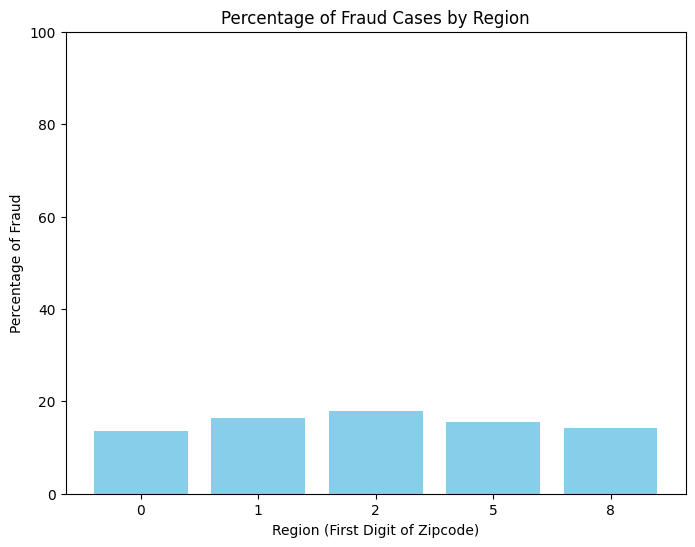

In [26]:
fraud_percentage_by_region = dataset.groupby(dataset['zip_code'].astype(str).str[0])['fraud'].mean() * 100

plt.figure(figsize=(8, 6))
plt.bar(fraud_percentage_by_region.index, fraud_percentage_by_region.values, color='skyblue')
plt.xlabel('Region (First Digit of Zipcode)')
plt.ylabel('Percentage of Fraud')
plt.title('Percentage of Fraud Cases by Region')
plt.ylim(0, 100)
plt.show()

The percentage of fraud appears very similar across drivers from different regions (different first digit of ZIP code). This suggests that <code>zip_code</code> might not be a good predictor of fraud, at least with respect to a driver's region.

11. `claim_date` (object): The date when the insurance claim was filed, in ‘MM/DD/YYYY’ format


Since <code>claim_day_of_week</code> already contains information about the day of the claim, we will look for differences in percentage of fraud by month and time of the month (e.g. start of the month).

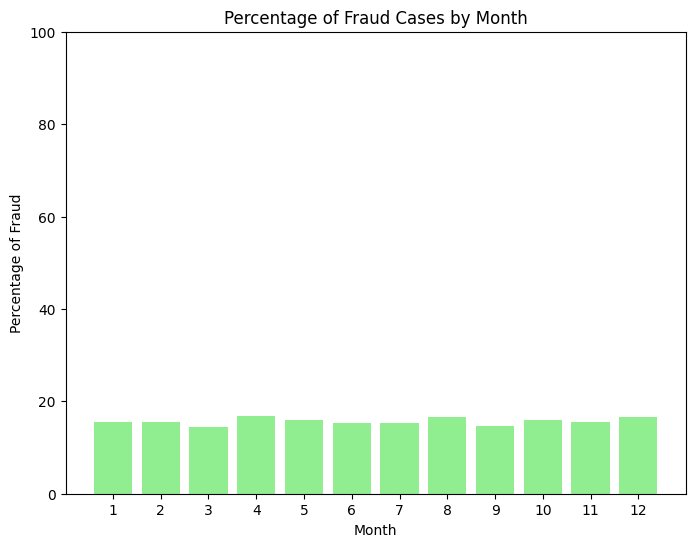

In [27]:
dataset['claim_date'] = pd.to_datetime(dataset['claim_date'])
fraud_percentage_by_month = dataset.groupby(dataset['claim_date'].dt.month)['fraud'].mean() * 100

plt.figure(figsize=(8, 6))
plt.bar(fraud_percentage_by_month.index, fraud_percentage_by_month.values, color='lightgreen')
plt.xlabel('Month')
plt.ylabel('Percentage of Fraud')
plt.title('Percentage of Fraud Cases by Month')
plt.ylim(0, 100)
plt.xticks(range(1, 13))
plt.show()

From the bar plots, we see that percentage of fraud is quite similar across different months. This suggests that the individual months from <code>claim_date</code> are not a good predictor of fraud. However, we might expect higher instances of fraud at different times of the month. For example, some individuals might be under financial pressure toward the end of the month, leading to an increase in fraudulent claims to cover expenses or financial strain. Therefore, we might still want to use some information from <code>claim_date</code> to engineer new features.

12. `claim_day_of_week` (object): The day of the week when the insurance claim was filed. (‘Monday’ - ‘Sunday’)


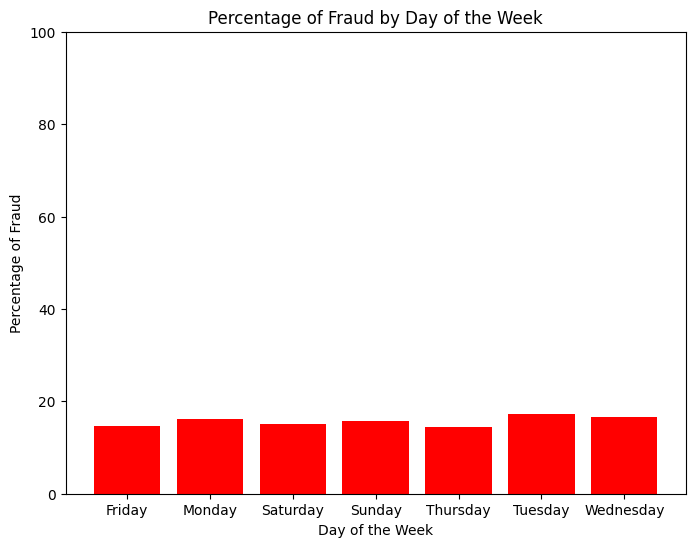

In [28]:
fraud_percentage_by_day = dataset.groupby('claim_day_of_week')['fraud'].mean() * 100

days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

plt.figure(figsize=(8, 6))
plt.bar(fraud_percentage_by_day.index, fraud_percentage_by_day.values, color='red')
plt.xlabel('Day of the Week')
plt.ylabel('Percentage of Fraud')
plt.title('Percentage of Fraud by Day of the Week')
plt.xticks(days_order)
plt.ylim(0, 100)
plt.show()

From the bar plot, we see that the percentage of fraud is very similar across the different days of the week. This suggests that the individual days in <code>claim_day_of_week</code> are not a good predictor of fraud. Intuitively, we still expect higher instances of fraud during weekdays as more cars are on the road due to commuting and work-related activities. Rush hours might provide opportunities for staged accidents or false claims. Therefore, we might still want to use some information from <code>claim_day_of_week</code> to engineer new features.

13. `accident_site` (object): The location/site of the accident. (‘Local’ / ‘Highway’ / ‘Parking Lot’)


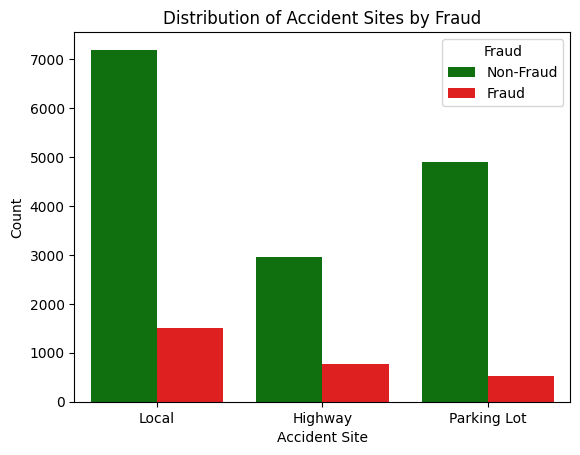

In [29]:
# Plot a side-by-side bar plot of the distribution of accident sites by fraud
sns.countplot(
    x="accident_site",
    hue="fraud",
    data= dataset,
    palette={1: "red", 0: "green"},
)
plt.title("Distribution of Accident Sites by Fraud")
plt.xlabel("Accident Site")
plt.ylabel("Count")
plt.legend(title='Fraud', labels=['Non-Fraud', 'Fraud'])
plt.show()

We can see that majority of accidents occur locally, followed by parking lots and then highways. Despite parking lots having more accidents than highways, more fraud attempts occur along the highways. This might be a useful pattern to predict fraud

14. `past_num_of_claims` (int64): The number of previous claims made by the driver.


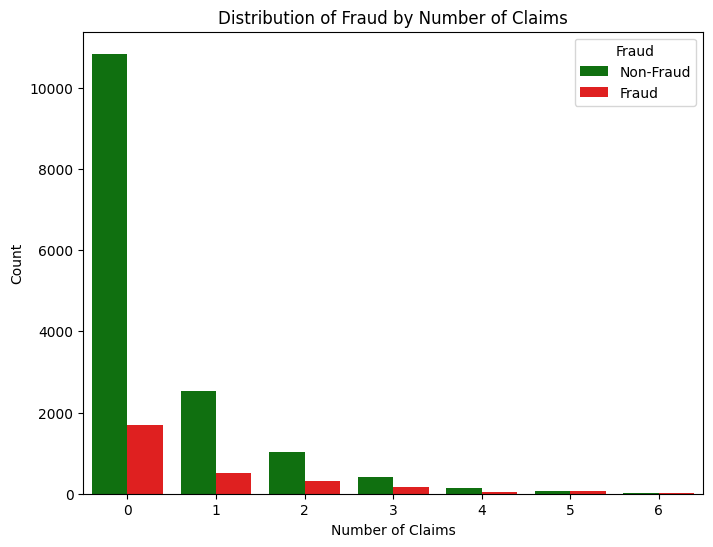

In [30]:
# Relationship between number of claims and fraud
plt.figure(figsize=(8, 6))
sns.countplot(x='past_num_of_claims', hue='fraud', data=dataset, palette={0: "green", 1: "red"})
plt.title('Distribution of Fraud by Number of Claims')
plt.xlabel('Number of Claims')
plt.ylabel('Count')
plt.legend(title='Fraud', labels=['Non-Fraud', 'Fraud'])
plt.show()

Most individuals have no prior claims, and this includes fraudsters, who rarely make consecutive claims. This might make it difficult to identify fraudsters and distinguish them from legitimate claims. Nevertheless, we can see a clear trend of fraudulent claims decreasing over the number of claims.

15. `witness_present_ind` (float64): An indicator of whether witnesses were present during the accident.(1.0: ‘Yes’,  0.0’ : No’)


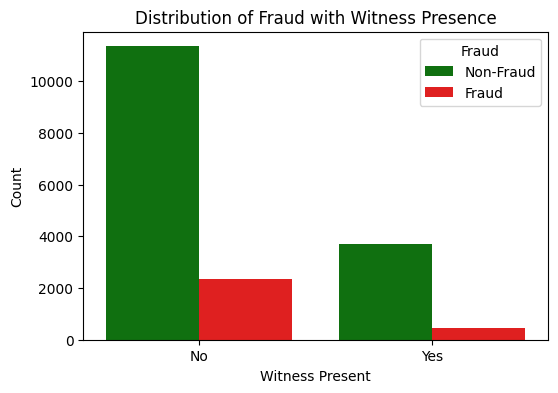

In [31]:
plt.figure(figsize=(6, 4))
sns.countplot(x='witness_present_ind', hue='fraud', data=dataset, palette={0: "green", 1: "red"})
plt.title('Distribution of Fraud with Witness Presence')
plt.xlabel('Witness Present')
plt.ylabel('Count')
plt.legend(title='Fraud', labels=['Non-Fraud', 'Fraud'])
plt.xticks(ticks=[0, 1], labels=['No', 'Yes'])
plt.show()

It seems that for most of the accidents, there were no witnesses. Also for most fraud cases, no witnesses were present. However, the fact that for some cases, there were witnesses present during the accident is concerning as it shows that fraudsters may have other collaborators assisting in their fraud.

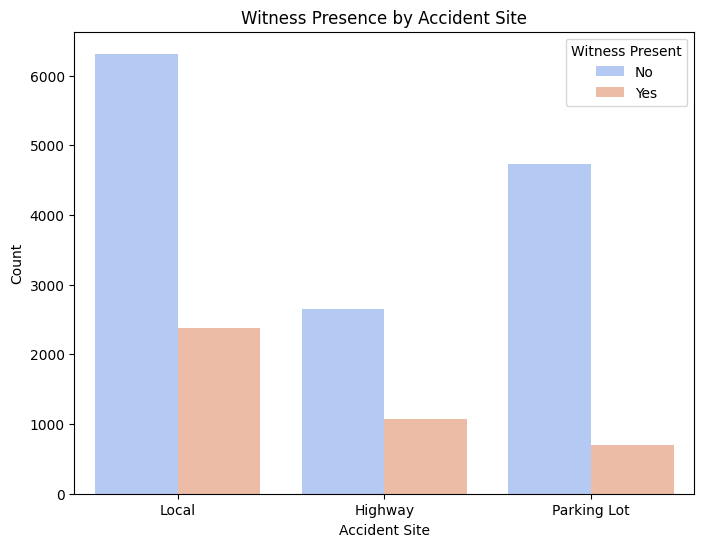

In [32]:
# Witness presence by accident site
plt.figure(figsize=(8, 6))
sns.countplot(x='accident_site', hue='witness_present_ind', data=dataset, palette='coolwarm')
plt.title('Witness Presence by Accident Site')
plt.xlabel('Accident Site')
plt.ylabel('Count')
plt.legend(title='Witness Present', labels=['No', 'Yes'])
plt.show()

We see that this distribution actually mirrors the distribution of accident sites by fraud. This could imply that where witnesses were present, frauds were more likely to take place.

16. `liab_prct` (int64): The liability percentage associated with the claim.


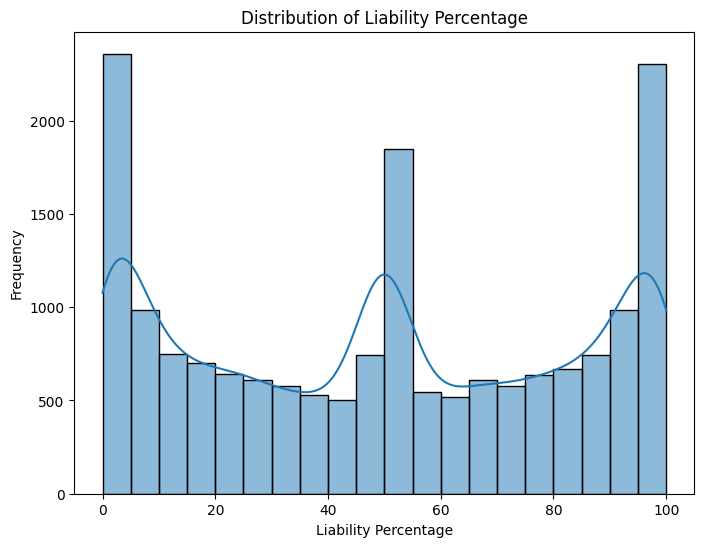

In [33]:
plt.figure(figsize=(8, 6))
sns.histplot(dataset['liab_prct'], bins=20, kde=True)
plt.title('Distribution of Liability Percentage')
plt.xlabel('Liability Percentage')
plt.ylabel('Frequency')
plt.show()

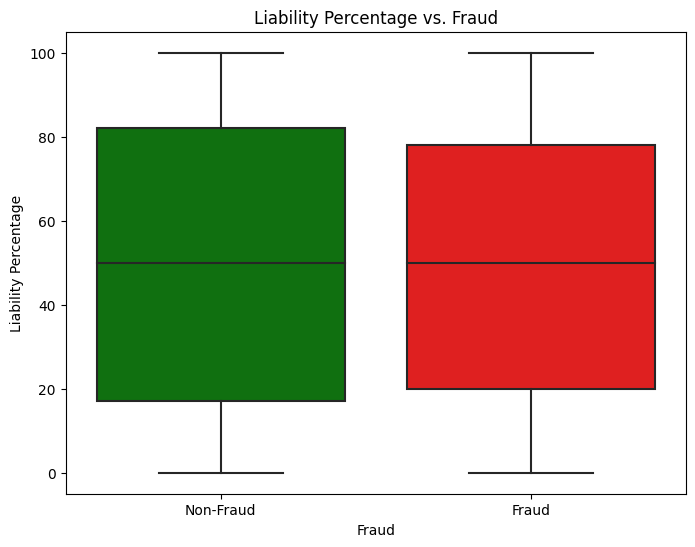

In [34]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='fraud', y='liab_prct', data=dataset, palette={0: "green", 1: "red"})
plt.title('Liability Percentage vs. Fraud')
plt.xlabel('Fraud')
plt.ylabel('Liability Percentage')
plt.xticks(ticks=[0, 1], labels=['Non-Fraud', 'Fraud'])
plt.show()

The distributions of Liability percentage for fraudulent and non fraudulent cases are relatively similar, with slight differences in their 25th and 75th percentiles. This percentage could thus provide some patterns in fraudulent transactions.

17. `channel` (object): The channel or method through which the claim was reported. ('Broker' / 'Online' / ‘Phone')


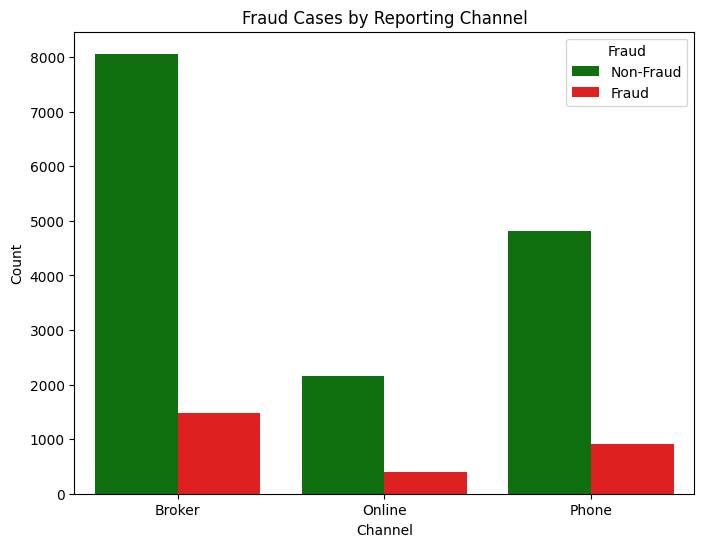

In [35]:
plt.figure(figsize=(8, 6))
sns.countplot(x='channel', hue='fraud', data=dataset, palette={0: "green", 1: "red"})
plt.title('Fraud Cases by Reporting Channel')
plt.xlabel('Channel')
plt.ylabel('Count')
plt.legend(title='Fraud', labels=['Non-Fraud', 'Fraud'])
plt.show()

Most fraud cases were either reported through a broker or through phones. 

18. `policy_report_filed_ind` (int64): An indicator of whether a policy report was filed as part of the claim.(1 : ‘Yes’, 0 : ‘No’)


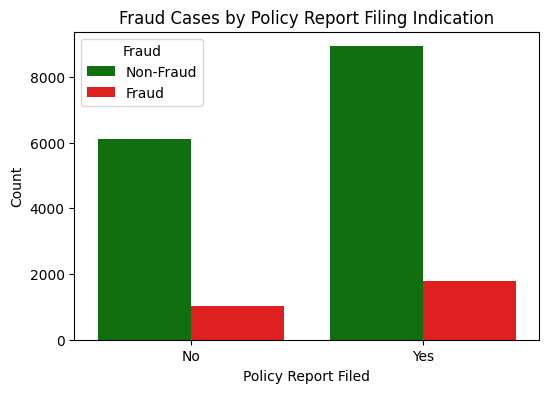

In [36]:
plt.figure(figsize=(6, 4))
sns.countplot(x='policy_report_filed_ind', hue='fraud', data=dataset, palette={0: "green", 1: "red"})
plt.title('Fraud Cases by Policy Report Filing Indication')
plt.xlabel('Policy Report Filed')
plt.ylabel('Count')
plt.legend(title='Fraud', labels=['Non-Fraud', 'Fraud'])
plt.xticks(ticks=[0, 1], labels=['No', 'Yes'])
plt.show()

In most fraud cases, a policy report was filed. 

19. `claim_est_payout` (float64): The estimated payout amount for the insurance claim.


We will first print out the range of estimated payout of claims in the dataset

In [37]:
claim_range = dataset['claim_est_payout'].min(), dataset['claim_est_payout'].max()
print("Range of claim_est_payout:", claim_range)

Range of claim_est_payout: (282.639432, 17218.34501)


We will then explore the distribution of estimated claim payouts through a histrogram

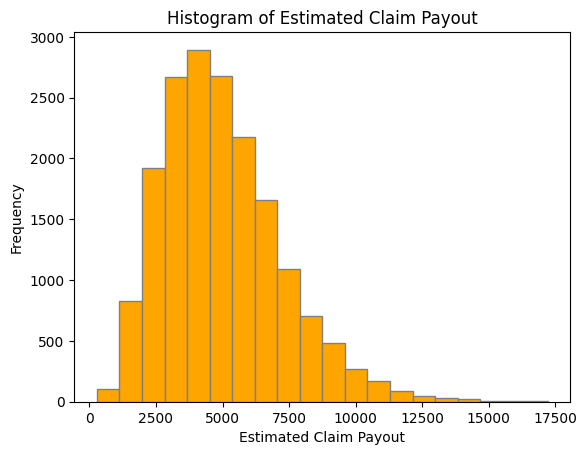

In [38]:
plt.hist(dataset['claim_est_payout'], bins=20, color='orange', edgecolor='grey')

plt.xlabel('Estimated Claim Payout')
plt.ylabel('Frequency')
plt.title('Histogram of Estimated Claim Payout')

plt.show()

From the histogram, we can see that the distribution of the vehicle prices is greatly right-skewed, with a majority of values lies within the range of $2000 - 7000.

We will now explore the pattern between estimated claim payouts and fraud class through density estimate plots.

C:\Users\wxlim\AppData\Local\Temp\ipykernel_38148\2352144407.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(dataset[dataset["fraud"]==1]["claim_est_payout"], shade=True, color="red", label="Fraudulent", ax=ax)
C:\Users\wxlim\AppData\Local\Temp\ipykernel_38148\2352144407.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(dataset[dataset["fraud"]==0]["claim_est_payout"], shade=True, color="green", label="Normal", ax=ax)


Text(0.5, 0.98, 'Estimated Claim Payouts')

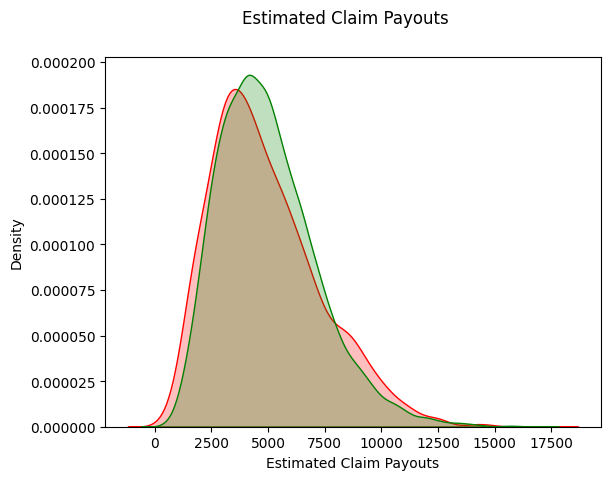

In [39]:
fig, ax = plt.subplots()

sns.kdeplot(dataset[dataset["fraud"]==1]["claim_est_payout"], shade=True, color="red", label="Fraudulent", ax=ax)
sns.kdeplot(dataset[dataset["fraud"]==0]["claim_est_payout"], shade=True, color="green", label="Normal", ax=ax)

ax.set_xlabel("Estimated Claim Payouts")
ax.set_ylabel("Density")

fig.suptitle("Estimated Claim Payouts")

From the density estimate plots above, we can see that the pattern between safety ratings and fraud are slightly different for both fraud class and non-fraud class, with the estimated claim payouts for fraud class peaking at a lower level. This might suggest that `claim_est_payout` might have some predictive powers for frauds.

20. `age_of_vehicle` (float64): The age of the vehicle involved in the claim.


We will first print out the range of age of vehicles in the dataset

In [40]:
age_range = dataset['age_of_vehicle'].min(), dataset['age_of_vehicle'].max()
print("Range of age_of_vehicle:", age_range)

Range of age_of_vehicle: (0.0, 16.0)


From the range, we can tell that the age of the vehicles range from 0 years to 16 years. 

From the values and based on common sense, it seems that the age of vehicle are in whole numbers, thus we would like to check the unique values inside `age_of_vehicles`.

In [41]:
dataset['age_of_vehicle'].unique()

array([ 9.,  4.,  3.,  7.,  8.,  5.,  6.,  2., 10.,  1., 12., 11.,  0.,
       13., 14., 16., 15.])

From the results, it is clear that `age_of_vehicles` are in whole numbers and hence have a discrete distribution. Hence we would like to convert it to integer values.

In [42]:
dataset['age_of_vehicle'] = dataset['age_of_vehicle'].astype(int)

We will then explore the distribution of age of vehicles through a barplot

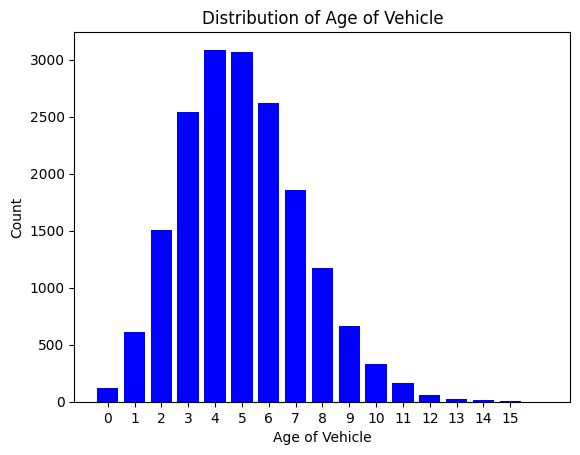

In [43]:
age_vehicle_counts = dataset['age_of_vehicle'].value_counts()

plt.bar(age_vehicle_counts.index, age_vehicle_counts.values, color=['blue'])
plt.xlabel('Age of Vehicle')
plt.xticks(np.arange(dataset['age_of_vehicle'].max()), np.arange(dataset['age_of_vehicle'].max()))
plt.ylabel('Count')
plt.title('Distribution of Age of Vehicle')

plt.show()

From the histogram, we can see that the distribution of the age of vehicle is slightly right-skewed, with a majority of values lies within the range of 3 - 8 years.

We will now explore the pattern between age of vehicle and fraud class through box plots.

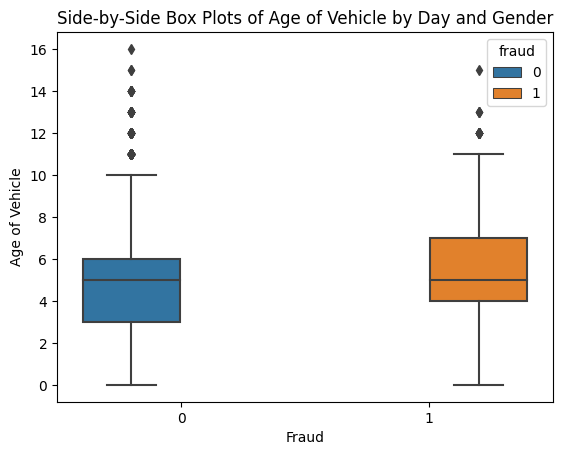

In [44]:
sns.boxplot(x="fraud", y="age_of_vehicle", hue="fraud", data=dataset)

# Add labels and title
plt.xlabel("Fraud")
plt.ylabel("Age of Vehicle")
plt.title("Side-by-Side Box Plots of Age of Vehicle by Day and Gender")

# Show the plot
plt.show()

From the side-by-side box plot above, we can see that the distribution of age of vehicles is slightly different across fraud class and non-fraud class. For fraud class , the age of the vehicles are slightly higher as compared to the non-fraud class. This suggest that `age_of_vehicle` might have some predictive power to detect frauds.

21. `vehicle_category` (object): The category or type of the vehicle.('Compact' / 'Large' / ‘Medium')


We will plot a bar graph to see the distribution of vehicle categories.

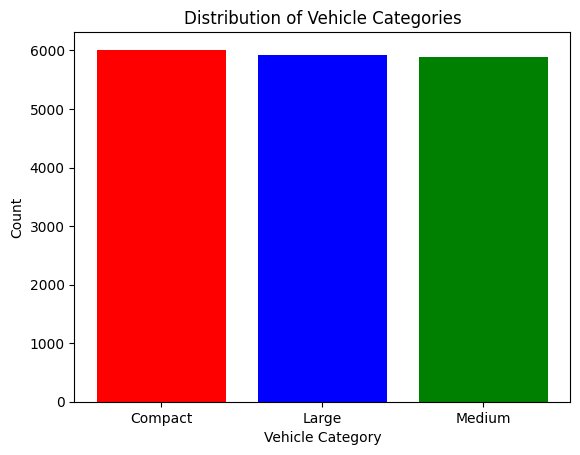

In [45]:
category_counts = dataset['vehicle_category'].value_counts()

plt.bar(category_counts.index, category_counts.values, color=['red', 'blue', 'green'])
plt.xlabel('Vehicle Category')
plt.ylabel('Count')
plt.title('Distribution of Vehicle Categories')

plt.show()

From the bar graph, we can see that the distribution of the vehicle categories is generally even.

We will now explore the pattern between vehicle categories and fraud cases through violin plots.

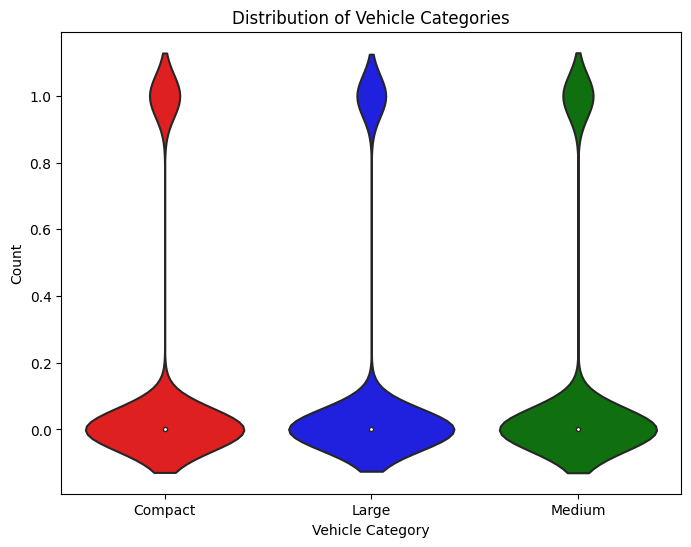

In [46]:
plt.figure(figsize=(8, 6))
sns.violinplot(x='vehicle_category', y='fraud', data=dataset, palette =['red', 'blue', 'green'])
plt.xlabel('Vehicle Category')
plt.ylabel('Count')
plt.title('Distribution of Vehicle Categories')
plt.show()

From the violin plots, we can see the shape of density distribution between fraud and non-fraud classes are very similar for all 3 vehicle categories. This suggests that `vehicle_category` might not be a good predictor for frauds.

22. `vehicle_price` (float64): The price of the vehicle.


We will first print out the range of vehicle prices in the dataset

In [47]:
vehicle_price_range = dataset['vehicle_price'].min(), dataset['vehicle_price'].max()
print("Range of vehicle price:", vehicle_price_range)

Range of vehicle price: (2457.329316, 127063.506)


From the range, we can tell that the range of vehicle prices is big. We will then explore the distribution of vehicle prices through a histrogram

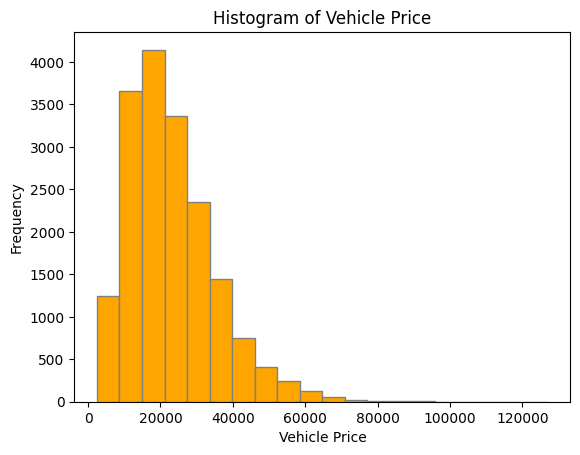

In [48]:
plt.hist(dataset['vehicle_price'], bins=20, color='orange', edgecolor='grey')

plt.xlabel('Vehicle Price')
plt.ylabel('Frequency')
plt.title('Histogram of Vehicle Price')

plt.show()

From the histogram, we can see that the distribution of the vehicle prices is greatly right-skewed, with a majority of values lies within the range of $5000 - 40000.

We will now explore the pattern between vehicle price and fraud class through density estimate plots.

C:\Users\wxlim\AppData\Local\Temp\ipykernel_38148\1917912519.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(dataset[dataset["fraud"]==1]["vehicle_price"], shade=True, color="red", label="Fraudulent", ax=ax)
C:\Users\wxlim\AppData\Local\Temp\ipykernel_38148\1917912519.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(dataset[dataset["fraud"]==0]["vehicle_price"], shade=True, color="green", label="Normal", ax=ax)


Text(0.5, 0.98, 'Vehicle Price vs Fraud Class')

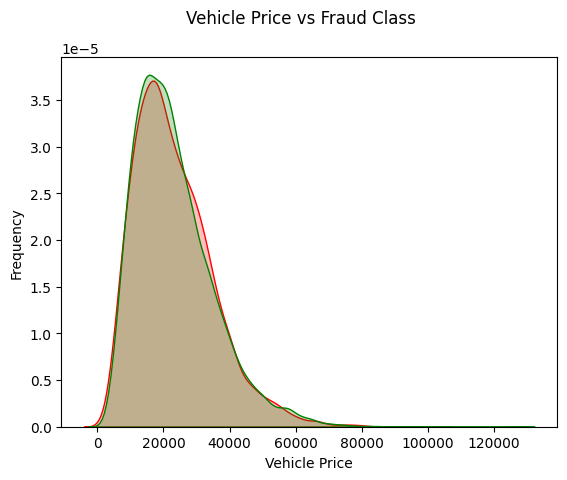

In [49]:
fig, ax = plt.subplots()

sns.kdeplot(dataset[dataset["fraud"]==1]["vehicle_price"], shade=True, color="red", label="Fraudulent", ax=ax)
sns.kdeplot(dataset[dataset["fraud"]==0]["vehicle_price"], shade=True, color="green", label="Normal", ax=ax)

ax.set_xlabel("Vehicle Price")
ax.set_ylabel("Frequency")

fig.suptitle("Vehicle Price vs Fraud Class")

From the density estimate plots above, we can see that the pattern between vehicle prices and fraud is a bit different between fraud class and non-fraud class, as fraud frequency overshadows non-fraud when vehicle price increase to above 30000. This might suggest that `vehicle_price` holds some good predictor for frauds.

23. `vehicle_color` (object): The color of the vehicle.


We will plot a bar graph to see the distribution of vehicle colors.

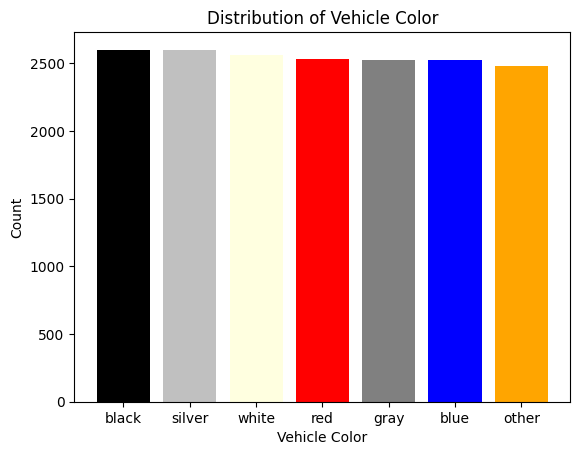

In [50]:
color_counts = dataset['vehicle_color'].value_counts()

plt.bar(color_counts.index, color_counts.values, color=['black', 'silver', 'lightyellow','red','gray','blue','orange'])
plt.xlabel('Vehicle Color')
plt.ylabel('Count')
plt.title('Distribution of Vehicle Color')

plt.show()

From the bar graph, we can see that the distribution of the vehicle colors is generally even.

We will now explore the pattern between vehicle categories and fraud cases through violin plots.

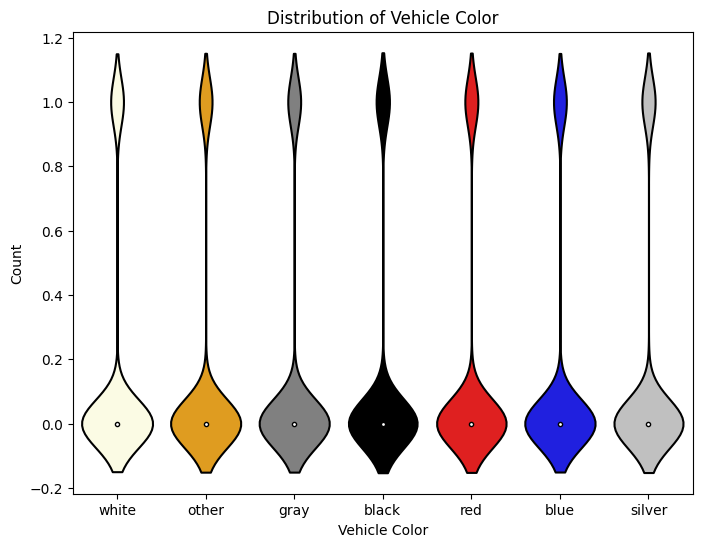

In [51]:
plt.figure(figsize=(8, 6))
sns.violinplot(x='vehicle_color', y='fraud', data=dataset, palette =['lightyellow', 'orange', 'gray','black','red','blue','silver'])
plt.xlabel('Vehicle Color')
plt.ylabel('Count')
plt.title('Distribution of Vehicle Color')
plt.show()

From the violin plots, we can see the shape of density distribution between fraud and non-fraud classes are very similar for all types of vehicle colors. This suggests that `vehicle_color` might not be a good predictor for frauds.

24. `vehicle_weight` (float64): The weight of the vehicle.


We will first print out the range of vehicle weights in the dataset

In [52]:
vehicle_weight_range = dataset['vehicle_weight'].min(), dataset['vehicle_weight'].max()
print("Range of vehicle weight:", vehicle_weight_range)

Range of vehicle weight: (2429.429302, 123016.6504)


From the range, we can tell that the range of vehicle weights is big. We will then explore the distribution of vehicle prices through a histrogram

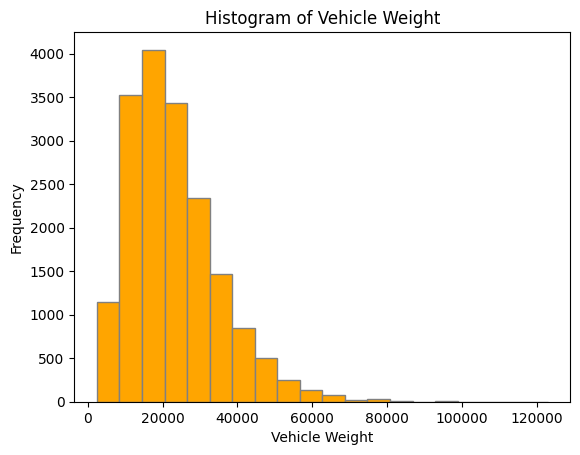

In [53]:
plt.hist(dataset['vehicle_weight'], bins=20, color='orange', edgecolor='grey')

plt.xlabel('Vehicle Weight')
plt.ylabel('Frequency')
plt.title('Histogram of Vehicle Weight')

plt.show()

From the histogram, we can see that the distribution of the vehicle weights is greatly right-skewed, with a majority of values lies within the range of 5000 - 40000.

We will now explore the pattern between vehicle weight and fraud class through density estimate plots.

C:\Users\wxlim\AppData\Local\Temp\ipykernel_38148\17252767.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(dataset[dataset["fraud"]==1]["vehicle_weight"], shade=True, color="red", label="Fraudulent", ax=ax)
C:\Users\wxlim\AppData\Local\Temp\ipykernel_38148\17252767.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(dataset[dataset["fraud"]==0]["vehicle_weight"], shade=True, color="green", label="Normal", ax=ax)


Text(0.5, 0.98, 'Vehicle Weight vs Fraud Class')

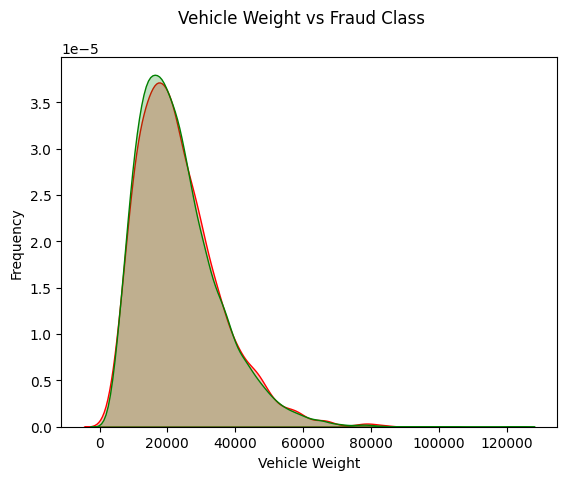

In [54]:
fig, ax = plt.subplots()

sns.kdeplot(dataset[dataset["fraud"]==1]["vehicle_weight"], shade=True, color="red", label="Fraudulent", ax=ax)
sns.kdeplot(dataset[dataset["fraud"]==0]["vehicle_weight"], shade=True, color="green", label="Normal", ax=ax)

ax.set_xlabel("Vehicle Weight")
ax.set_ylabel("Frequency")

fig.suptitle("Vehicle Weight vs Fraud Class")

From the density estimate plots above, we can see that the pattern between vehicle weights and fraud is generally the same for both fraud class and non-fraud class. This might suggest that `vehicle_weight` is not a good predictor for frauds.

25. `fraud` (int64): An indicator of whether the insurance claim is associated with fraud (1 : fraud , 0 : non-fraud).

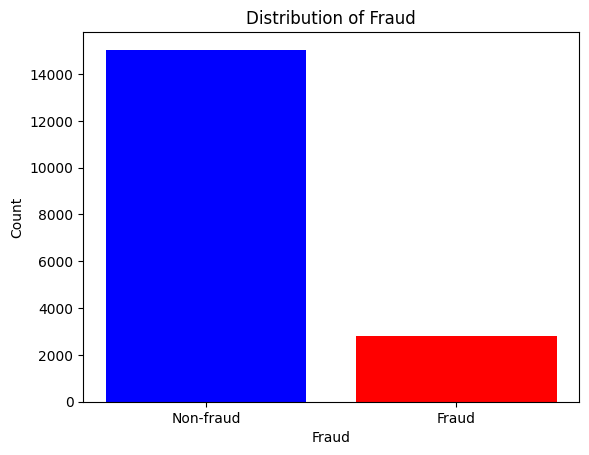

In [55]:
fraud_mappings = dataset['fraud'].map({1: 'Fraud', 0.0: 'Non-fraud'})
fraud_counts = fraud_mappings.value_counts()

plt.bar(fraud_counts.index, fraud_counts.values, color=['blue', 'red'])
plt.xlabel('Fraud')
plt.ylabel('Count')
plt.title('Distribution of Fraud')

plt.show()

From the bar graph, we can see that the distribution of the target variable, fraud, is very uneven, with much more non-fraud compared to fraud cases.

In [56]:
#Checker: no removal or modification to the full dataset during EDA. Shape should be (17836, 25)
dataset.shape

(17836, 25)

<h2> Dropping of Features

Following EDA, we are able to deduce that some features provide not much predictive power in predicting fraud. Using these features to train our models will likely lead to no significant increase in model performance and instead contribute to increasing dimensionality and training time. Hence, we will be removing the following features: 

1. `claim_number`
2. `gender`
9. `living_status`
10. `zip_code`
21. `vehicle_category`
23. `vehicle_color`
24. `vehicle_weight`

In [57]:
to_drop = ['claim_number', 'gender', 'living_status', 'zip_code', 'vehicle_category', 'vehicle_color', 'vehicle_weight']
dataset = dataset.drop(to_drop, axis = 1)
dataset.shape

(17836, 18)

View Dataset

In [58]:
dataset.head()

,age_of_driver,marital_status,safty_rating,annual_income,high_education_ind,address_change_ind,claim_date,claim_day_of_week,accident_site,past_num_of_claims,witness_present_ind,liab_prct,channel,policy_report_filed_ind,claim_est_payout,age_of_vehicle,vehicle_price,fraud
0,46,1.0,85,38301,1,1,2016-12-16,Friday,Local,1,0.0,74,Broker,0,7530.940993,9,12885.45235,0
1,21,0.0,75,30445,0,1,2015-02-12,Thursday,Highway,1,1.0,79,Online,0,2966.024895,4,29429.45218,0
2,49,0.0,87,38923,0,1,2016-12-06,Tuesday,Local,0,0.0,0,Broker,0,6283.888333,3,21701.18195,1
3,58,1.0,58,40605,1,0,2016-05-05,Thursday,Local,3,0.0,99,Broker,1,6169.747994,4,13198.27344,1
4,38,1.0,95,36380,1,0,2015-10-27,Tuesday,Highway,0,1.0,7,Broker,0,4541.387150,7,38060.21122,0


<h2> Train-test Spilt

After global preprocessing, we will split the full datset into train and test. We will then use the train datset for analysis, feature engineering and training of the models, and the test dataset for applying the same feature engineering methods and evaluation of the models. 

In [59]:
train_dataset, test_dataset = train_test_split(dataset, test_size=0.2, random_state=0)
train_dataset.reset_index(inplace=True, drop=True)
test_dataset.reset_index(inplace=True, drop=True)

In [60]:
train_dataset.shape

(14268, 18)

In [61]:
test_dataset.shape

(3568, 18)

<h2> Local Preprocessing

In the following codes, we will attempt to complete necessary preprocessing steps including data cleaning and feature engineering for the remaining 18 features so that they are ready for training of models later. <br><br>
In local preprocessing, we will determine what kinds of scaling/binning or other engineering methods to perform on the features solely based on trends in the train dataset, then apply the same methods to the test dataset. This is to <b>prevent target leakage<b>.

2. `age_of_driver` (int64): The age of the driver associated with the insurance claim. <br><br>

We will first print out the range of ages in the train dataset

In [62]:
age_range_train = train_dataset['age_of_driver'].min(), train_dataset['age_of_driver'].max()
print("Range of age_of_driver in train dataset:", age_range_train)

Range of age_of_driver in train dataset: (18, 200)


Research shows that the world record for oldest person still driving was 108 years. Therefore we can deduce that rows with age entries older than 108 are inaccurate and untrustworthy. We will now check how many such rows there are. 

In [63]:
count_large_age_train = (train_dataset['age_of_driver'] > 108).sum()

print("Number of rows with age_of_driver larger than 108 in train dataset:", count_large_age_train)

Number of rows with age_of_driver larger than 108 in train dataset: 3


Since 3 rows are very insignificant compared to the size of the train dataset (>14000 rows), we decided to remove these rows containing outliers in the age_of_driver column to preserve realiability of the dataset. 

In [64]:
train_dataset = train_dataset[train_dataset['age_of_driver'] <= 108]

We will now plot the distribution of age of drivers in the train dataset again through a histrogram. 

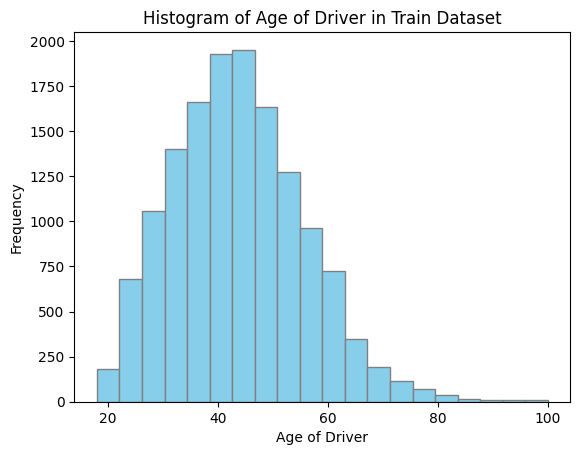

In [65]:
plt.hist(train_dataset['age_of_driver'], bins=20, color='skyblue', edgecolor='grey')

plt.xlabel('Age of Driver')
plt.ylabel('Frequency')
plt.title('Histogram of Age of Driver in Train Dataset')

plt.show()

From the histrogram with the KDE curve, we can see that after removal of outliers, the age distribution becomes more normally distributed. Therefore we will perform the same on the test dataset. 

In [66]:
test_dataset = test_dataset[test_dataset['age_of_driver'] <= 108]

To increase computational efficiency, we will bin the ages and label encode them into 4 main groups <br><br>
<=25 : 0 <br>
<=50 : 1 <br>
<=75 : 2 <br>
above 75: 3 <br>

In [67]:
def map_age(age):
    if age <= 25:
        return 0
    elif 25 < age <= 50:
        return 1
    elif 50 < age <= 75:
        return 2
    else:
        return 3

train_dataset['age'] = train_dataset['age_of_driver'].apply(map_age)
train_dataset = train_dataset.drop('age_of_driver', axis=1)

test_dataset['age'] = test_dataset['age_of_driver'].apply(map_age)
test_dataset = test_dataset.drop('age_of_driver', axis=1)


4. `marital_status` (float64): The marital status of the driver. (1.0 : ‘Married’ , 0.0: ‘Single’)<br><br>
Although seemingly encoded, we notice that the marital status column is actually float instead of integer. We will map this again to proper 0/1 integers for easier training of models later. 

In [68]:
train_dataset['marital_status'] = train_dataset['marital_status'].astype(int)

In [69]:
test_dataset['marital_status'] = test_dataset['marital_status'].astype(int)

5. `safety_rating` (int64): A safety rating associated with the driver or vehicle, higher values indicate higher safety. <br><br>

We will first print out the range of safety ratings in the train datset. 

In [70]:
safety_rating_range_train = train_dataset['safty_rating'].min(), train_dataset['safty_rating'].max()
print("Range of safety ratings in the train dataset:", safety_rating_range)

Range of safety ratings in the train dataset: (1, 100)


We can see that the ratings are scores in a 100 point system. We will now plot the distribution of safety ratings in the train dataset in a histrogram with 10 points per bin. 

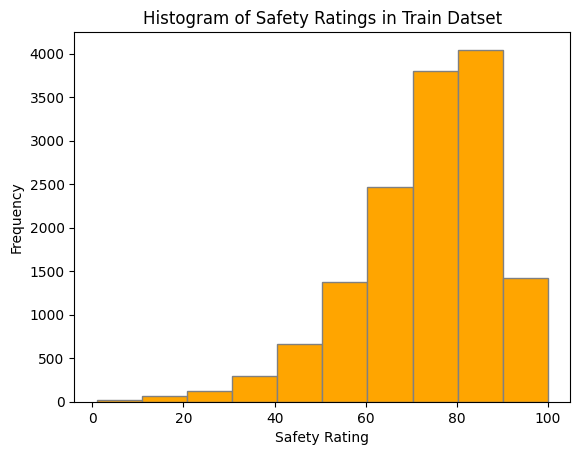

In [71]:
plt.hist(train_dataset['safty_rating'], bins=10, color='orange', edgecolor='grey')

plt.xlabel('Safety Rating')
plt.ylabel('Frequency')
plt.title('Histogram of Safety Ratings in Train Datset')

plt.show()

Based on the distribution above, it is reasonable for us to conclude that a safety rating below 50 should be considered as a failure. To increase computational efficiency, we will map the rating scores to grades based on the grading scheme below to label encode this feature: <br><br>
91 - 100: 0 <br>
81 - 90: 1 <br>
71 - 80: 2 <br>
61 - 70: 3 <br>
51 - 60: 4 <br>
below 50: 5 <br>

In [72]:
def map_safety_rating(rating):
    if rating >= 91:
        return 0
    elif rating >= 81:
        return 1
    elif rating >= 71:
        return 2
    elif rating >= 61:
        return 3
    elif rating >= 51:
        return 4
    else:
        return 5

train_dataset['safety_grade'] = train_dataset['safty_rating'].apply(map_safety_rating)
train_dataset = train_dataset.drop('safty_rating', axis=1)

We will now plot a bar graph to examine the new distribution of the safety grades after mapping. 

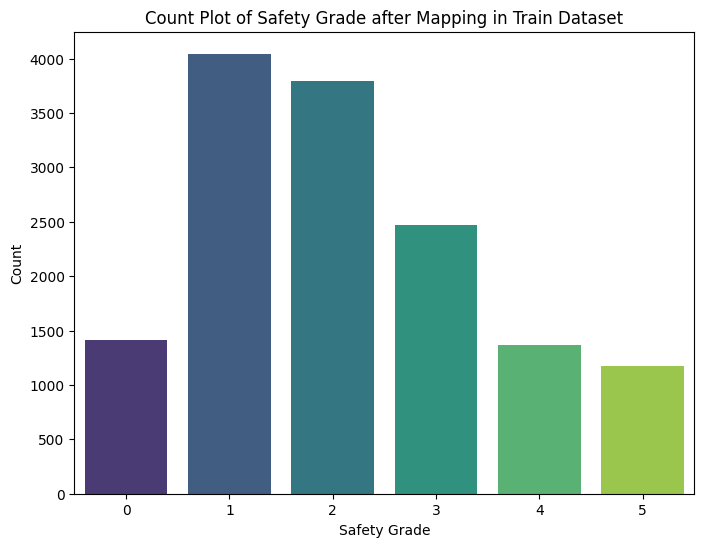

In [73]:
plt.figure(figsize=(8, 6))
sns.countplot(x='safety_grade', data=train_dataset, order=[0,1,2,3,4,5], palette='viridis')
plt.xlabel('Safety Grade')
plt.ylabel('Count')
plt.title('Count Plot of Safety Grade after Mapping in Train Dataset')
plt.show()

From the bar graph, we can see that the distribution of safety grades after mapping from ratings gave an even distribution amongst B, C and D with less on both A and F. This is a healthy distribution and we will apply the same mapping to the test dataset. 

In [74]:
test_dataset['safety_grade'] = test_dataset['safty_rating'].apply(map_safety_rating)
test_dataset = test_dataset.drop('safty_rating', axis=1)

6. `annual_income` (int64): The annual income of the policyholder or driver.<br><br>

We will first print out the range of annual incomes in the train dataset

In [75]:
income_range_train_train = train_dataset['annual_income'].min(), train_dataset['annual_income'].max()
print("Range of annual income:", income_range_train_train)

Range of annual income: (-1, 46066)


We can see from the range that there are negative annual incomes. This is against our common sense. We will explore further with a boxplot to see the distribution of the annual income in train dataset. 

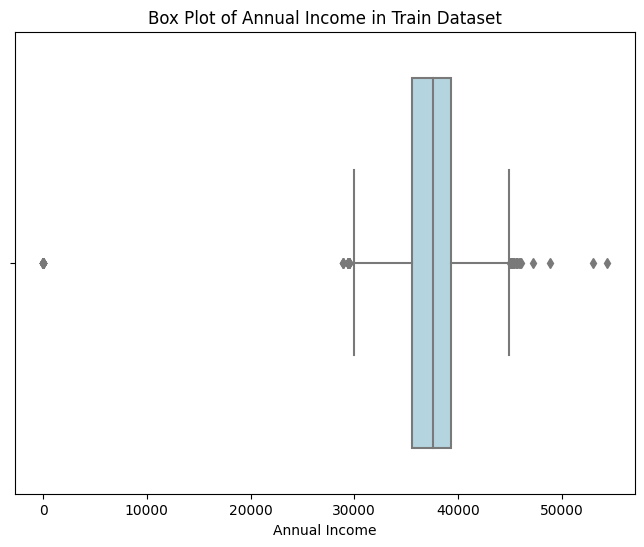

In [76]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=dataset['annual_income'], color='lightblue')
plt.xlabel('Annual Income')
plt.title('Box Plot of Annual Income in Train Dataset')
plt.show()

From the boxplot, we can see there is a small group of outliers at the far left with income <500. We will print out the total number of such data points. 

In [77]:
count_low_income_train = (train_dataset['annual_income'] < 500).sum()

print("Number of rows with annual income less than 500 in train dataset:", count_low_income_train)

Number of rows with annual income less than 500 in train dataset: 11


Since 11 rows are very insignificant compared to the size of our train dataset (>14000) and dropping them will not have a big impact, we decided to drop these outliers to improve the reliability of our dataset. 

In [78]:
train_dataset = train_dataset[train_dataset['annual_income'] >= 500]

We will now plot a histrogram to see the distribution of annual incomes after dropping the outliers. 

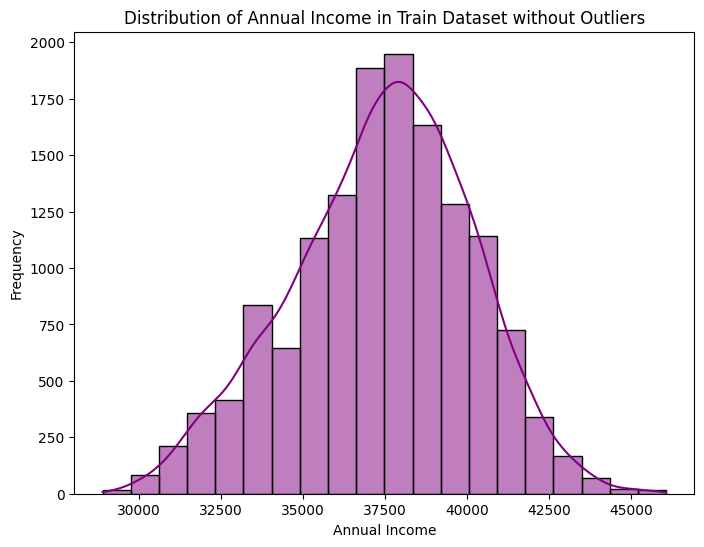

In [79]:
plt.figure(figsize=(8, 6))
sns.histplot(train_dataset['annual_income'], bins=20, kde=True, color='purple')
plt.xlabel('Annual Income')
plt.ylabel('Frequency')
plt.title('Distribution of Annual Income in Train Dataset without Outliers')
plt.show()

From the histrogram, we can see that the distribution of annual incomes became more normal after dropping the outliers. <br><br>
We will then bin the annual income into 6 categories and label encode them to reduce computational costs later. These categories are: <br>
below $32500: 0 <br>
$32500 - $35000: 1<br>
$35000 - $37500: 2<br>
$37500 - $40000: 3<br>
$40000 - $42500: 4<br>
above $42500: 5<br>

In [80]:
def map_income(income):
    if income < 32500:
        return 0
    elif 32500 <= income < 35000:
        return 1
    elif 35000 <= income < 37500:
        return 2
    elif 37500 <= income < 40000:
        return 3
    elif 40000 <= income < 42500:
        return 4
    else:
        return 5

train_dataset['annual_income_category'] = train_dataset['annual_income'].apply(map_income)
train_dataset = train_dataset.drop('annual_income', axis=1)

After mapping the annual income into the categories, we will plot a bar graph to check the new distribution of the categorical column annual_income_category.

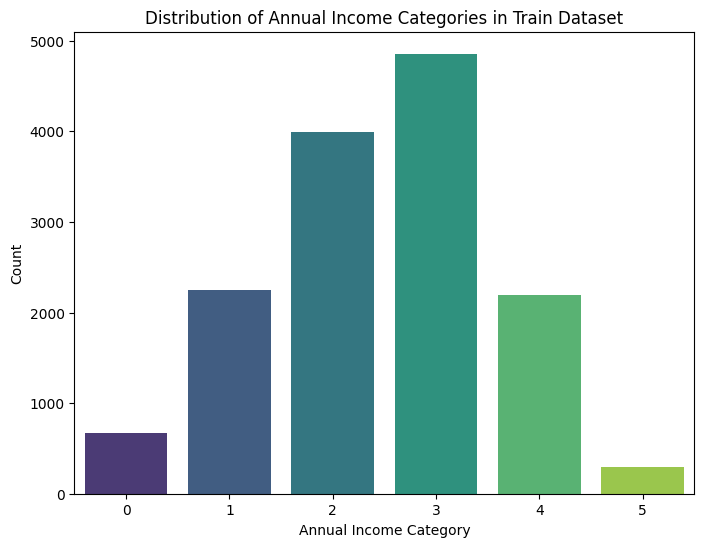

In [81]:
plt.figure(figsize=(8, 6))
sns.countplot(x='annual_income_category', data=train_dataset, order=[0,1,2,3,4,5], palette='viridis')
plt.xlabel('Annual Income Category')
plt.ylabel('Count')
plt.title('Distribution of Annual Income Categories in Train Dataset')
plt.show()

From the bar graph, we can see that the distribution of annual income after mapping to categories gave an almost normal distribution with the most in upper middle and the least in both lowest and highest. This is a healthy distribution and we will apply the same mapping to the test dataset. 

In [82]:
test_dataset = test_dataset[test_dataset['annual_income'] >= 500]
test_dataset['annual_income_category'] = test_dataset['annual_income'].apply(map_income)
test_dataset = test_dataset.drop('annual_income', axis=1)

7. `high_education_ind` (int64): An indicator of the driver's level of education, higher values indicate higher education level


----No processing Required----

8. `address_change_ind` (int64): An indicator of whether the driver has recently changed their address.(1 : ‘Yes’, 0 : ‘No’)


----No processing Required----

11. `claim_date` (object): The date when the insurance claim was filed, in ‘MM/DD/YYYY’ format


In [83]:
bins = [0, 10, 20, 31]  # Define bins
# 0 = start, 1 = middle, 2 = end
labels = [0, 1, 2]  # Labels for bins

train_dataset['part_of_month'] = pd.cut(train_dataset['claim_date'].dt.day, bins=bins, labels=labels, right=True).astype(int)
train_dataset = train_dataset.drop('claim_date', axis=1)

test_dataset['part_of_month'] = pd.cut(test_dataset['claim_date'].dt.day, bins=bins, labels=labels, right=True).astype(int)
test_dataset = test_dataset.drop('claim_date', axis=1)

12. `claim_day_of_week` (object): The day of the week when the insurance claim was filed. (‘Monday’ - ‘Sunday’)


In [84]:
weekdays = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday']

train_dataset['weekday'] = train_dataset['claim_day_of_week'].isin(weekdays).astype(int)
train_dataset = train_dataset.drop('claim_day_of_week', axis=1)

test_dataset['weekday'] = test_dataset['claim_day_of_week'].isin(weekdays).astype(int)
test_dataset = test_dataset.drop('claim_day_of_week', axis=1)

13. `accident_site` (object): The location/site of the accident. (‘Local’ / ‘Highway’ / ‘Parking Lot’)


In [85]:
# One Hot Encode accident_site.
train_dataset = pd.get_dummies(train_dataset, columns=['accident_site'], prefix='accident_site')
test_dataset = pd.get_dummies(test_dataset, columns=['accident_site'], prefix='accident_site')

14. `past_num_of_claims` (int64): The number of previous claims made by the driver.


----No processing Required----

15. `witness_present_ind` (float64): An indicator of whether witnesses were present during the accident.(1.0: ‘Yes’,  0.0’ : No’)


In [86]:
# Replace 1.0 with 1 and 0.0 with 0
train_dataset['witness_present_ind'] = train_dataset['witness_present_ind'].astype(int)
test_dataset['witness_present_ind'] = test_dataset['witness_present_ind'].astype(int)

16. `liab_prct` (int64): The liability percentage associated with the claim.


The liability percentage associated with the claim ranges from 0 - 100%.
As such we can bin this features into 4 main groups to better find patterns in the data. The groups will be a label encoded value.

- <= 25: 0
- <= 50: 1
- <= 75: 2
- greater than 75 : 3

In [87]:
def map_liability_prct(liab_prct):
    if liab_prct <= 25:
        return 0
    elif 25 < liab_prct <= 50:
        return 1
    elif 50 < liab_prct <= 75:
        return 2
    else:
        return 3

train_dataset['liab_prct'] = train_dataset['liab_prct'].apply(map_liability_prct)
test_dataset['liab_prct'] = test_dataset['liab_prct'].apply(map_liability_prct)


17. `channel` (object): The channel or method through which the claim was reported. ('Broker' / 'Online' / ‘Phone')


In [88]:
# One Hot Encode channel.
train_dataset = pd.get_dummies(train_dataset, columns=['channel'], prefix='channel')
test_dataset = pd.get_dummies(test_dataset, columns=['channel'], prefix='channel')

18. `policy_report_filed_ind` (int64): An indicator of whether a policy report was filed as part of the claim.(1 : ‘Yes’, 0 : ‘No’)


----No processing Required----

19. `claim_est_payout` (float64): The estimated payout amount for the insurance claim.


We will first print out the range of estimated claim payouts in the train dataset

In [89]:
claim_range_train_train = train_dataset['claim_est_payout'].min(), train_dataset['claim_est_payout'].max()
print("Range of estimated claim payouts:", claim_range_train_train)

Range of estimated claim payouts: (282.639432, 16876.29594)


This range is similar to our observation in the whole dataset. As this range aligns with the research findings on claim payouts for car accidents, no outlier analysis is performed to avoid removal of useful information.

We will now plot a histrogram to see the distribution of estimated claim payputs in the train dataset.

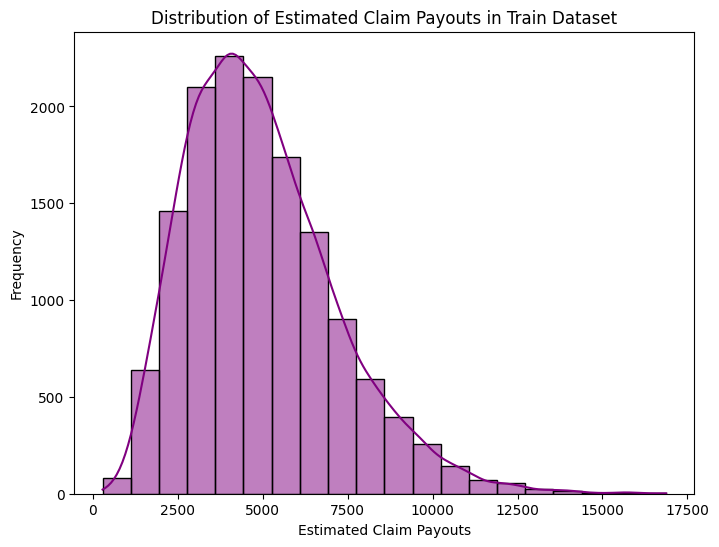

In [90]:
plt.figure(figsize=(8, 6))
sns.histplot(train_dataset['claim_est_payout'], bins=20, kde=True, color='purple')
plt.xlabel('Estimated Claim Payouts')
plt.ylabel('Frequency')
plt.title('Distribution of Estimated Claim Payouts in Train Dataset')
plt.show()

From the histogram, we can see that the distribution of `claim_est_payout` is greatly similar to the distribution in the whole dataset. this means that it is a fair partition.

We will then bin and map the estimated claim payout into 5 categories while keeping the ordinal relationship to reduce computational costs later.

In [91]:
# Quantile Binning
claim_est_payout = train_dataset['claim_est_payout']
claim_est_payout = np.sort(claim_est_payout)

num_bins = 5

#Calculate quantiles
quantiles = np.linspace(0, 100, num_bins + 1)[1:-1]
bin_edges = np.percentile(claim_est_payout, quantiles)
bin_edges = np.insert(bin_edges, [0, len(bin_edges)], [claim_est_payout[0], claim_est_payout[-1]])

bins = pd.cut(claim_est_payout, bin_edges, include_lowest=True)

print("Bins:", bins)

Bins: [(282.63800000000003, 3050.482], (282.63800000000003, 3050.482], (282.63800000000003, 3050.482], (282.63800000000003, 3050.482], (282.63800000000003, 3050.482], ..., (6649.392, 16876.296], (6649.392, 16876.296], (6649.392, 16876.296], (6649.392, 16876.296], (6649.392, 16876.296]]
Length: 14254
Categories (5, interval[float64, right]): [(282.63800000000003, 3050.482] < (3050.482, 4121.449] < (4121.449, 5201.854] < (5201.854, 6649.392] < (6649.392, 16876.296]]


In [92]:
def map_claim_est_payout(payout):
    if payout > 6649.392:
        return 4
    elif payout > 5201.854:
        return 3
    elif payout > 4121.449:
        return 2
    elif payout > 3050.482:
        return 1
    else:
        return 0

train_dataset['claim_est_payout_category'] = train_dataset['claim_est_payout'].apply(map_claim_est_payout)
train_dataset = train_dataset.drop('claim_est_payout', axis=1)

After mapping the estimated claim payouts into the categories, we will plot a bar graph to check the new distribution of the categorical column `claim_est_payout_category`.

Text(0.5, 1.0, 'Distribution ofEstimated Claim Payout Category in Train')

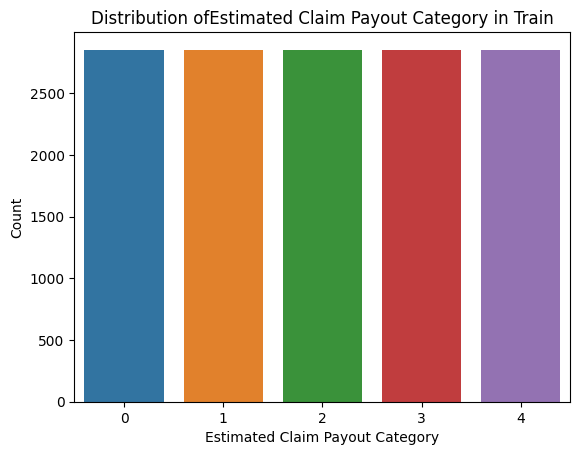

In [93]:
claim_est_payout_category_counts_train = train_dataset['claim_est_payout_category'].value_counts()

sns.countplot(x='claim_est_payout_category', data=train_dataset,order=[0,1,2,3,4])
plt.xlabel('Estimated Claim Payout Category')
plt.ylabel('Count')
plt.title('Distribution ofEstimated Claim Payout Category in Train')

From the bar graph, we can see that the distribution of estimated claim payout after mapping to categories gave an almost normal distribution. This is a healthy distribution as it reflects the original distribution which approximately follows a normal distribution, and we will apply the same mapping and encoding to the test dataset.

In [94]:
test_dataset['claim_est_payout_category'] = test_dataset['claim_est_payout'].apply(map_claim_est_payout)
test_dataset = test_dataset.drop('claim_est_payout', axis=1)

20. `age_of_vehicle` (int64): The age of the vehicle involved in the claim. (type converted during EDA)


We will first print out the range of age of vehicles in the train dataset

In [95]:
age_vehicle_train = train_dataset['age_of_vehicle']
age_vehicle_range_train = age_vehicle_train.min(),age_vehicle_train.max()
print("Range of age of vehicle in train:", age_vehicle_range_train)

Range of age of vehicle in train: (0, 16)


This range is similar to our observation in the whole dataset. As this range aligns with research findings on the age of vehicles, no outlier analysis is performed to avoid removal of useful information.

We will now plot a barplot to see the distribution of age of vehicles in train.

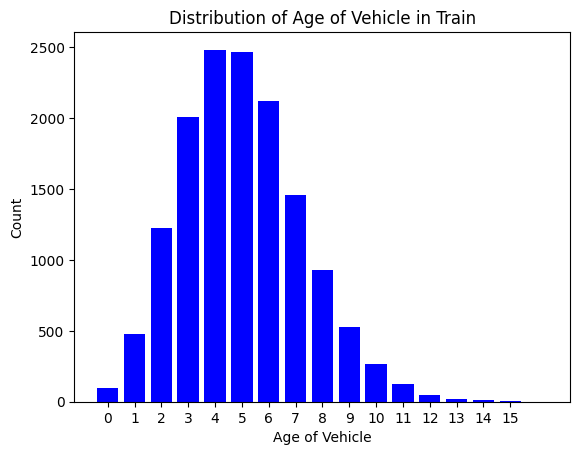

In [96]:
age_vehicle_counts_train = train_dataset['age_of_vehicle'].value_counts()

plt.bar(age_vehicle_counts_train.index, age_vehicle_counts_train.values, color=['blue'])
plt.xlabel('Age of Vehicle')
plt.xticks(np.arange(dataset['age_of_vehicle'].max()), np.arange(dataset['age_of_vehicle'].max()))
plt.ylabel('Count')
plt.title('Distribution of Age of Vehicle in Train')

plt.show()

From the bar graph, we can see that the distribution of `age_of_vehicle` is greatly similar to the distribution in the whole dataset. this means that it is a fair partition.

We will then bin the age of Vehicles into 3 categories to reduce computational costs later.

In [97]:
# Quantile Binning
age_of_vehicle = train_dataset['age_of_vehicle']
age_of_vehicle = np.sort(age_of_vehicle)

num_bins = 3

#Calculate quantiles
quantiles = np.linspace(0, 100, num_bins + 1)[1:-1]
bin_edges = np.percentile(age_of_vehicle, quantiles)
bin_edges = np.insert(bin_edges, [0, len(bin_edges)], [age_of_vehicle[0], age_of_vehicle[-1]])

bins = pd.cut(age_of_vehicle, bin_edges, include_lowest=True)

print("Bins:", bins)

Bins: [(-0.001, 4.0], (-0.001, 4.0], (-0.001, 4.0], (-0.001, 4.0], (-0.001, 4.0], ..., (6.0, 16.0], (6.0, 16.0], (6.0, 16.0], (6.0, 16.0], (6.0, 16.0]]
Length: 14254
Categories (3, interval[float64, right]): [(-0.001, 4.0] < (4.0, 6.0] < (6.0, 16.0]]


In [98]:
def map_age_vehicle(age):
    if age <= 4:
        return 'Low'
    elif 4 < age <= 6:
        return 'Middle'
    else:
        return 'High'

train_dataset['age_of_vehicle_category'] = train_dataset['age_of_vehicle'].apply(map_age_vehicle)
train_dataset = train_dataset.drop('age_of_vehicle', axis=1)

After mapping the age of vehicles into the categories, we will plot a bar graph to check the new distribution of the categorical column `age_of_vehicle_category`.

Text(0.5, 1.0, 'Distribution of Age of Vehicle Category in Train')

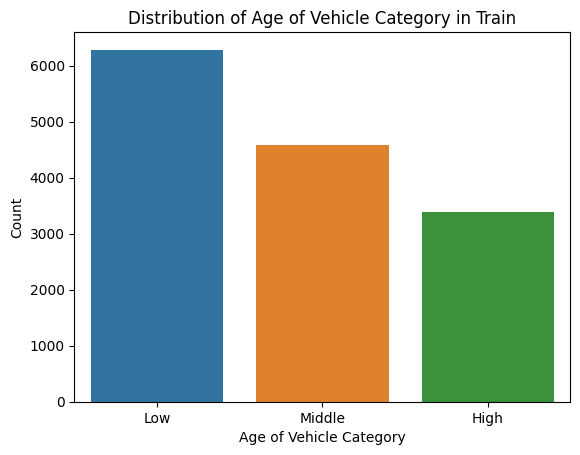

In [99]:
age_vehicle_category_counts_train = train_dataset['age_of_vehicle_category'].value_counts()

sns.countplot(x='age_of_vehicle_category', data=train_dataset,order=['Low', 'Middle', 'High'])
plt.xlabel('Age of Vehicle Category')
plt.ylabel('Count')
plt.title('Distribution of Age of Vehicle Category in Train')

From the bar graph, we can see that the distribution of age of vehicle after mapping to 3 categories is close to uniform. This is a relatively healthy distribution as it ensures that each bin contains approximately the same number of observations, and we will apply the same mapping to the test dataset.

In [100]:
test_dataset['age_of_vehicle_category'] = test_dataset['age_of_vehicle'].apply(map_age_vehicle)
test_dataset = test_dataset.drop('age_of_vehicle', axis=1)

Finally, we will encode the age of vehicle categories using ordinal encoding for both train and test datasets in order to preserve the hierarchy information.

In [101]:
# Apply the ordinal encoding on both train and test data
train_dataset['age_of_vehicle_category'] = train_dataset['age_of_vehicle_category'].map({'Low': 0, 'Middle': 1, 'High': 2})
test_dataset['age_of_vehicle_category'] = test_dataset['age_of_vehicle_category'].map({'Low': 0, 'Middle': 1, 'High': 2})

22. `vehicle_price` (float64): The price of the vehicle.


We will first print out the range of vehicle prices in the train dataset

In [102]:
price_range_train_train = train_dataset['vehicle_price'].min(), train_dataset['vehicle_price'].max()
print("Range of vehicle price:", price_range_train_train)

Range of vehicle price: (2474.959177, 127063.506)


We will now plot a histrogram to see the distribution of vehicle prices in train.

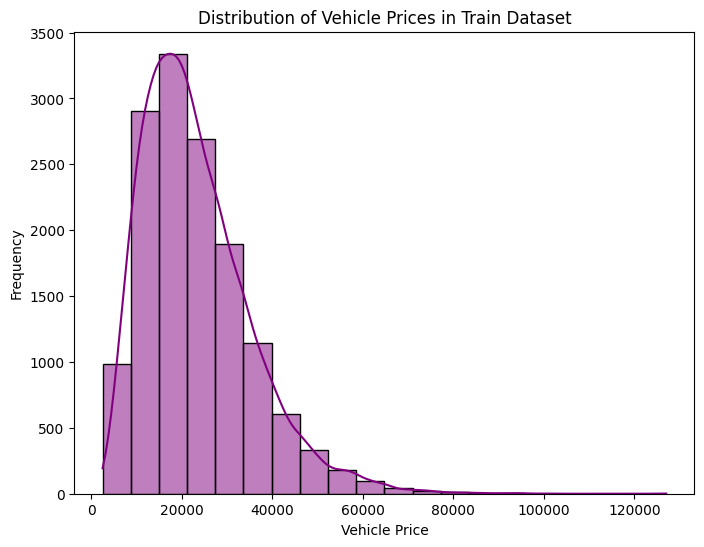

In [103]:
plt.figure(figsize=(8, 6))
sns.histplot(train_dataset['vehicle_price'], bins=20, kde=True, color='purple')
plt.xlabel('Vehicle Price')
plt.ylabel('Frequency')
plt.title('Distribution of Vehicle Prices in Train Dataset')
plt.show()

This range is similar to our observation in the whole dataset. As this range aligns with the commonly acceptable range of vehicle prices, no outlier analysis is performed to avoid removal of useful information.

From the histogram, we can see that the distribution of `vehicle_price` is greatly similar to the distribution in the whole dataset. this means that it is a fair partition.

We will then bin and map the vehicle prices into 3 categories while keeping the ordinal relationship to reduce computational costs later.

In [104]:
# Quantile Binning
vehicle_price = train_dataset['vehicle_price']
vehicle_price = np.sort(vehicle_price)

num_bins = 3

#Calculate quantiles
quantiles = np.linspace(0, 100, num_bins + 1)[1:-1]
bin_edges = np.percentile(vehicle_price, quantiles)
bin_edges = np.insert(bin_edges, [0, len(bin_edges)], [vehicle_price[0], vehicle_price[-1]])

bins = pd.cut(vehicle_price, bin_edges, include_lowest=True)

print("Bins:", bins)

Bins: [(2474.9579999999996, 16537.136], (2474.9579999999996, 16537.136], (2474.9579999999996, 16537.136], (2474.9579999999996, 16537.136], (2474.9579999999996, 16537.136], ..., (26305.425, 127063.506], (26305.425, 127063.506], (26305.425, 127063.506], (26305.425, 127063.506], (26305.425, 127063.506]]
Length: 14254
Categories (3, interval[float64, right]): [(2474.9579999999996, 16537.136] < (16537.136, 26305.425] < (26305.425, 127063.506]]


In [105]:
def map_price(price):
    if price >= 26305.425:
        return 2
    elif price > 16537.136:
        return 1
    else:
        return 0

train_dataset['vehicle_price_category'] = train_dataset['vehicle_price'].apply(map_price)
train_dataset = train_dataset.drop('vehicle_price', axis=1)

After mapping the vehicle prices into the categories, we will plot a bar graph to check the new distribution of the categorical column `vehicle_price_category`.

Text(0.5, 1.0, 'Distribution of Vehicle Price Category in Train')

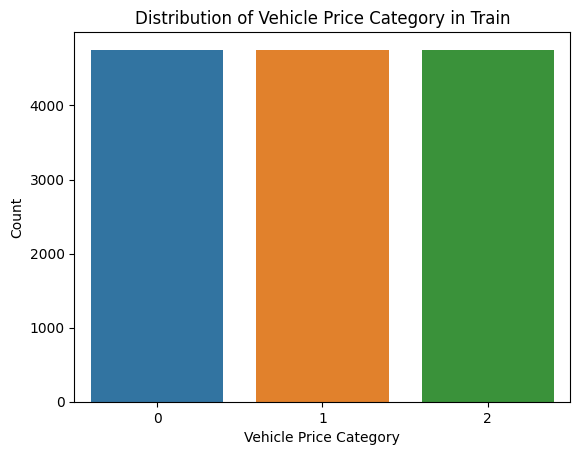

In [106]:
vehicle_price_category_counts_train = train_dataset['vehicle_price_category'].value_counts()

sns.countplot(x='vehicle_price_category', data=train_dataset,order=[0,1,2])
plt.xlabel('Vehicle Price Category')
plt.ylabel('Count')
plt.title('Distribution of Vehicle Price Category in Train')

From the bar graph, we can see that the distribution of vehicle prices after mapping to 3 categories is uniform. This is a healthy distribution as it ensures that each bin contains approximately the same number of observations, and we will apply the same mapping to the test dataset.

In [107]:
test_dataset['vehicle_price_category'] = test_dataset['vehicle_price'].apply(map_price)
test_dataset = test_dataset.drop('vehicle_price', axis=1)

<h2> Saving of Train and Test Datasets </h2><br>
Finally, we will save the preprocessed train and test datasets. We will use them for training and evaluation of our models later. 

In [108]:
train_dataset.head()

,marital_status,high_education_ind,address_change_ind,past_num_of_claims,witness_present_ind,liab_prct,policy_report_filed_ind,fraud,age,safety_grade,...,weekday,accident_site_Highway,accident_site_Local,accident_site_Parking Lot,channel_Broker,channel_Online,channel_Phone,claim_est_payout_category,age_of_vehicle_category,vehicle_price_category
0,1,1,1,2,0,2,0,1,0,4,...,0,0,1,0,0,1,0,4,0,1
1,1,1,1,0,0,2,0,1,1,1,...,1,1,0,0,0,0,1,4,2,0
2,1,0,1,1,1,3,1,0,2,1,...,1,0,1,0,1,0,0,4,2,2
3,1,0,0,1,0,0,1,0,2,2,...,0,0,1,0,0,0,1,3,2,1
4,1,1,0,0,0,0,0,0,1,1,...,1,0,0,1,1,0,0,4,0,1


In [109]:
train_dataset.shape

(14254, 22)

In [110]:
test_dataset.shape

(3564, 22)

In [111]:
train_dataset.to_csv('data/train.csv', index=False)
test_dataset.to_csv('data/test.csv', index=False)

<h2> View Splits

In [112]:
train = pd.read_csv('data/train.csv')
train.shape

(14254, 22)

In [113]:
test = pd.read_csv('data/test.csv')
test.shape

(3564, 22)

In [114]:
train.head()

,marital_status,high_education_ind,address_change_ind,past_num_of_claims,witness_present_ind,liab_prct,policy_report_filed_ind,fraud,age,safety_grade,...,weekday,accident_site_Highway,accident_site_Local,accident_site_Parking Lot,channel_Broker,channel_Online,channel_Phone,claim_est_payout_category,age_of_vehicle_category,vehicle_price_category
0,1,1,1,2,0,2,0,1,0,4,...,0,0,1,0,0,1,0,4,0,1
1,1,1,1,0,0,2,0,1,1,1,...,1,1,0,0,0,0,1,4,2,0
2,1,0,1,1,1,3,1,0,2,1,...,1,0,1,0,1,0,0,4,2,2
3,1,0,0,1,0,0,1,0,2,2,...,0,0,1,0,0,0,1,3,2,1
4,1,1,0,0,0,0,0,0,1,1,...,1,0,0,1,1,0,0,4,0,1


In [115]:
test.head()

,marital_status,high_education_ind,address_change_ind,past_num_of_claims,witness_present_ind,liab_prct,policy_report_filed_ind,fraud,age,safety_grade,...,weekday,accident_site_Highway,accident_site_Local,accident_site_Parking Lot,channel_Broker,channel_Online,channel_Phone,claim_est_payout_category,age_of_vehicle_category,vehicle_price_category
0,1,1,1,0,0,3,0,0,0,0,...,1,0,0,1,0,1,0,4,1,1
1,1,1,1,0,0,3,1,0,1,1,...,1,0,1,0,1,0,0,3,0,2
2,0,0,0,0,0,2,1,0,1,1,...,1,0,1,0,0,1,0,3,2,1
3,0,1,1,0,0,3,0,0,1,1,...,0,0,1,0,1,0,0,1,1,2
4,1,1,0,0,0,0,0,0,1,3,...,1,0,1,0,0,0,1,1,1,1
